<center><img src=https://i.ytimg.com/vi/b1FDDub2_wg/maxresdefault.jpg width="800"/><center>

## **Importing libraries**

In [1]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as go
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# For the predictive models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import matthews_corrcoef,balanced_accuracy_score,roc_curve, roc_auc_score, accuracy_score,classification_report, confusion_matrix, recall_score, precision_score,f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier 
# Removing annoying warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## **Data load**

In [124]:
#@title
churn_data = pd.read_csv("/content/Bank churn data.csv")
churn_data.sample(2)
# Dropping unnecessary columns
churn_data = churn_data[churn_data.columns[:-2]]
churn_data = churn_data.drop(["CLIENTNUM"], axis=1) 

In [ ]:
#splitting the data for the BI  report
new_df1_target0=churn_data.loc[churn_data["Attrition_Flag"]=='Existing_Customer']
new_df1_target1=churn_data.loc[churn_data["Attrition_Flag"]=='Attrited_Customer']

In [135]:
churn_data_copy = churn_data.copy()
churn_data_copy['Attrition_Flag'] = churn_data_copy['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})

##**Data information**

This dataset contains 10,000 records, each of it corresponds to a different bank's customer. The target is attrition_flag, a binary variable that describes whether the user decided to leave the bank or not, the data include this clint information.

1.	Clientnum: Client number. Unique identifier for the customer holding the account

2.	Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0

3.	Customer_Age: Demographic variable - Customer's Age in Years

4.	Gender: Demographic variable - M=Male, F=Female

5.	Dependent_count: Demographic variable - Number of dependents

6.	Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

7.	Marital_Status: Demographic variable - Married, Single, Unknown

8.	Income_Category: Demographic variable -Annual Income Category of the account holder (< 40K,40K-60K, 60K−80K, 80K−120K, > $120K, Unknown)

9.	Card_Category; Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

10.	Months_on_book:Months on book (Time of Relationship)

11.	Total_Relationship_Count: Total no. of products held by the customer

12.	Months_Inactive_12_mon: No. of months inactive in the last 12 months

13.	Contacts_Count_12_mon: No. of Contacts in the last 12 months

14.	Credit_Limit: Credit Limit on the Credit Card

15.	Total_Revolving_Bal: Total Revolving Balance on the Credit Card

16.	Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

17.	Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

18.	Total_Trans_Amt: Total Transaction Amount (Last 12 months)

19.	Total_Trans_Ct: Total Transaction Count (Last 12 months)

20.	Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

21.	Avg_Utilization_Ratio: Average Card Utilization Ratio



In [4]:
#@title
churn_data.describe(include=[np.number], percentiles=[0.1, 0.25,  0.5, 0.75]).T

,count,mean,std,min,10%,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,36.000,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,26.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,2.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,1.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,1.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,1762.000,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,683.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.531,0.631,0.736,0.859,3.397


Key notes:

---


1.	Customer_Age has a mean of 46.33 and a standard deviation of 8.02. 
    The range is from 26 to 73.
2.	Dependent_count has a mean of 2.35 and a standard deviation of 1.30. 
    The range is from 0 to 5.
3.	Months_on_book has a mean of 35.93 and a standard deviation of 7.99.
    The range is from 13 to 56.
4.	Total_Relationship_Count has a mean of 3.81 and a standard deviation of 1.55. The range is from 1 to 6.
5.	Months_Inactive_12_mon has a mean of 2.34 and a standard deviation of 1.01. The range is from 0 to 6.
6.	Contacts_Count_12_mon has a mean of 2.46 and a standard deviation of 1.11. The range is from 0 to 6.
7.	Total_Revolving_Bal has a mean of 1162.81 and a standard deviation of 814.99


In [5]:
#@title
c = churn_data['Attrition_Flag'].value_counts()
pct_churn = (100 * churn_data['Attrition_Flag'].value_counts() / len(churn_data['Attrition_Flag'])).apply(lambda x:round(x,2))
result = pd.concat([c, pct_churn], axis=1)
result.columns = ['Count', 'Percentage']
print(result)


                   Count  Percentage
Existing Customer   8500       83.93
Attrited Customer   1627       16.07


Data is highly imbalanced, ratio = 84:16

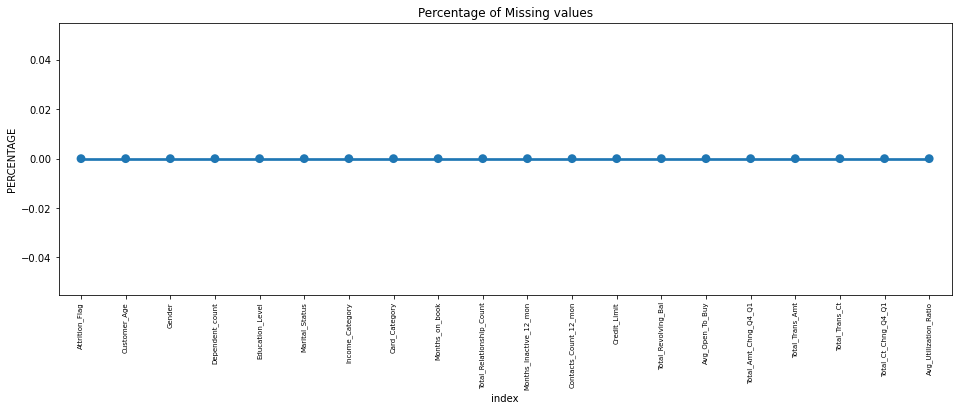

In [6]:
missing = pd.DataFrame((churn_data.isnull().sum())*100/churn_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [7]:
#@title
# count the number of 'Unknown' values in each column
unknown_counts = churn_data[churn_data == 'Unknown'].count()
unknown_counts_df = pd.DataFrame({'Column': unknown_counts.index, 'Unknown Count': unknown_counts.values})
unknown_counts_df = unknown_counts_df[unknown_counts_df['Unknown Count'] > 0]
unknown_counts_df

,Column,Unknown Count
4,Education_Level,1519
5,Marital_Status,749
6,Income_Category,1112


There is no missing data, the missing values were replaced with the value 'Unknown'

## **recognising the problem**

Customer churn is one of the most important metrics for any business to evaluate, it accures when customers stop using a company's products or services, either by canceling their subscriptions, not renewing their contracts, or choosing to take their business elsewhere.

It's a measure of customer loyalty and can happen for reasons like dissatisfaction, high prices, or better alternatives, and it may indicate problems with a company's products, services, or customer experience, leading to a loss of market share, increased acquisition costs, and reduced revenue. 

For that reason businesses monitor and analyze customer churn to identify root causes and take corrective actions to improve customer retention, making it a critical metric for revenue and profitability.




# **Project overview:**



## **Part 1 - Data Visualization and analysis:**

In this section, we will use various data visualization techniques to explore and analyze what influences bank churn rates. By visualizing the data, we can better understand how various factors, such as peronal and account information, and transaction history, impact the likelihood of customer churn.

We will create graphs, charts, and other visualizations to help us identify patterns, trends, and outliers in the data. This will allow us to gain insights into the factors that have the greatest influence on customer churn rates. We will also use statistical techniques to test the significance of our findings and ensure that they are not due to random chance.

Overall, our goal is to use data visualization and analysis to gain a deeper understanding of the factors that drive customer churn in the banking industry and to develop strategies to improve customer retention and loyalty.





## **Part 2 - Data preprocessing:**

Before developing a machine learning model for customer churn prediction, it's important to preprocess the data to ensure that it's in a suitable format for analysis. This involves several steps, such as cleaning the data, dealing with missing values, and encoding categorical variables.

Firstly, the data will be cleaned by removing any duplicate or unnecessary entries, fixing inconsistent data formatting, and handling outliers. Next, any missing values will be dealt with using appropriate techniques such as imputation or deletion, depending on the amount and type of missing data.

Furthermore, categorical variables will be encoded into numerical values using techniques such as one-hot encoding or label encoding, so that they can be used in the machine learning model. Feature scaling or normalization might also be applied to ensure that all features are on a similar scale.

By completing these preprocessing steps, the data will be ready for the next stage of the project, which is developing a machine learning model for customer churn prediction.


##**Part 3 - Model selection for customer churn prediction:**

The objective is to train a ML model that returns the probability of a customer to churn. This is a binary classification task, therefore F1-score, and precisoin, and recall are  good metrics to evaluate the performance of this dataset.

##**Part 4 -Results**

The result section of my analysis would include a summary of my findings, including any significant patterns or trends that emerged from the data. 
I will  also discuss the implications of the results for the bank and its customer retention efforts, recommendations for specific strategies or tactics that the bank can employ to reduce churn and improve customer satisfaction.
I will also adress any limitations or potential sources of bias in the data as well as areas where further research or data collection may be needed to better understand the factors contributing to customer churn in this context. 

## **Research questions**

The research questions I would try answer on in this bank churn data analysis project are:

1) What are the key drivers of churn in the bank? 
    Are there particular demographic groups or customer segments that are 
    more  likely to churn?

2) How does the length of the customer relationship impact churn? 
   Are long-term customers less likely to churn than newer customers?

3) Is there a relationship between the number of products or services a      customer uses and their likelihood of churning?

4) How does the customer's interaction with the bank, such as frequency of calls, impact churn?

# **Part 1 - Data visualization and anlysis**

## ***1) What are the key drivers of churn in the bank? Are there particular demographic groups or customer segments that are more likely to churn?***

###**a) Impact of gender on attrition**

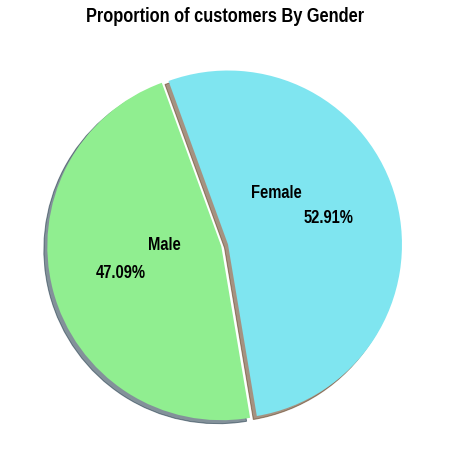

In [143]:
#@title
import matplotlib.font_manager as fm

# set the font family
font_family = 'Liberation Sans Narrow'

# check if the font is available
if font_family not in [f.name for f in fm.fontManager.ttflist]:
    print(f'{font_family} is not available on your system.')
else:
    labels = ['\nMale\n', '\nFemale\n']
    sizes = [churn_data.Gender[churn_data['Gender']=='M'].count(), churn_data.Gender[churn_data['Gender']=='F'].count()]
    explode = (0.02, 0.02)

    fig1, ax1 = plt.subplots(figsize=(10, 8))
    wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.2f%%',explode=explode,
            shadow=True, startangle=110, textprops={'fontsize': 18, 'fontfamily': font_family, 'fontweight': 'bold'})

    # adjust the vertical position of the labels
    texts[0].set_position((-0.25, 0))
    texts[1].set_position((0.15, 0.3))

    # set the color of the labels and title to white
    label_color = 'black'
    title_color = 'black'

    # set the text color for labels and title
    plt.setp(ax1.spines.values(), color=label_color)
    for text in texts + autotexts:
        plt.setp(text, color=label_color)
    plt.setp(ax1.title, color=title_color)

    # set the color of the wedges
    wedges[0].set_facecolor('#90EE90')
    wedges[1].set_facecolor('#7FE5F0')

    plt.title("Proportion of customers By Gender", fontdict={'fontsize': 20, 'fontfamily': font_family, 'fontweight': 'bold'})

    # remove the background color
    fig1.patch.set_facecolor('none')
    ax1.patch.set_facecolor('none')

    plt.show()


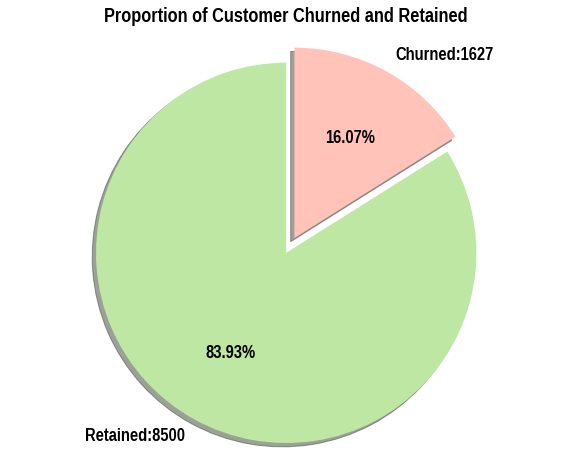

In [144]:
#@title
import matplotlib.font_manager as fm

male_data = churn_data[churn_data['Gender'] == 'M']['Attrition_Flag'].value_counts()
female_data = churn_data[churn_data['Gender'] == 'F']['Attrition_Flag'].value_counts()
# set the font family
font_family = 'Liberation Sans Narrow'

# check if the font is available
if font_family not in [f.name for f in fm.fontManager.ttflist]:
    print(f'{font_family} is not available on your system.')
else:
    labels = ['Retained:{}'.format(male_data[0]+female_data[0]), 'Churned:{}'.format(male_data[1]+female_data[1])]
    sizes = [churn_data.Attrition_Flag[churn_data['Attrition_Flag']=='Existing Customer'].count(), churn_data.Attrition_Flag[churn_data['Attrition_Flag']=='Attrited Customer'].count()]
    explode = (0.01, 0.08)

    colors = ['#BEE7A3', '#FFC3BA'] # lighter shades of green and red
    fig1, ax1 = plt.subplots(figsize=(10, 8))
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
            shadow=True, startangle=90, textprops={'fontsize': 18, 'fontfamily': font_family, 'fontweight': 'bold'})

    # # adding labels to the slices
    # for i, v in enumerate(sizes):
    #     ax1.text(0, -0.1+(i*0.1), labels[i], fontdict={'fontsize': 14, 'fontfamily': font_family, 'fontweight': 'bold'})

    ax1.axis('equal')
    plt.title("Proportion of Customer Churned and Retained", fontdict={'fontsize': 20, 'fontfamily': font_family, 'fontweight': 'bold'})

    plt.show()



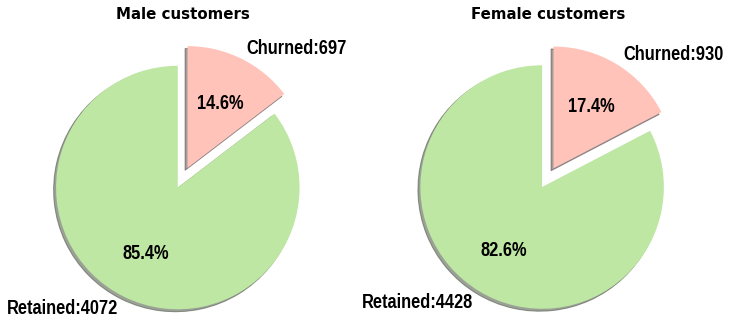

In [145]:
#@title

male_data = churn_data[churn_data['Gender'] == 'M']['Attrition_Flag'].value_counts()
female_data = churn_data[churn_data['Gender'] == 'F']['Attrition_Flag'].value_counts()
# set the font family
font_family = 'Liberation Sans Narrow'
# create two subplots for male and female
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
labels_male = ['Retained:{}'.format(male_data[0]), 'Churned:{}'.format(male_data[1])]
# plot pie chart for male
male_data = churn_data[churn_data['Gender'] == 'M']['Attrition_Flag'].value_counts()
explode = [0.1, 0.08]  # add an explosion effect to the second slice
colors = ['#BEE7A3', '#FFC3BA']  # set green for existing and red for attrited
axs[0].pie(male_data, autopct='%1.1f%%',labels=labels_male, explode=explode, colors=colors,startangle=90, shadow=True, textprops={'fontsize': 20, 'fontfamily': font_family, 'fontweight': 'bold'})
axs[0].set_title('Male customers',color = 'black',weight = 'bold',fontsize =15)

# plot pie chart for female
labels_female = ['Retained:{}'.format(female_data[0]), 'Churned:{}'.format(female_data[1])]
female_data = churn_data[churn_data['Gender'] == 'F']['Attrition_Flag'].value_counts()
explode = [0.1, 0.08]  # add an explosion effect to the second slice
colors = ['#BEE7A3', '#FFC3BA']  # set green for existing and red for attrited
axs[1].pie(female_data, autopct='%1.1f%%',labels=labels_female, explode=explode, colors=colors,startangle=90, shadow=True, textprops={'fontsize': 20, 'fontfamily': font_family, 'fontweight': 'bold'})
axs[1].set_title('Female customers',color = 'black',weight = 'bold',fontsize = 15)

axs[0].patch.set_facecolor('none')
axs[1].patch.set_facecolor('none')

# set the text color for labels and title
 # set the color of the labels and title to white
label_color = 'black'
title_color = 'black'
plt.setp(axs[0].spines.values(), color=label_color)
for text in axs[0].texts:
    plt.setp(text, color=label_color)
    plt.setp(axs[0].title, color=title_color)
plt.setp(axs[1].spines.values(), color=label_color)
for text in axs[1].texts:
    plt.setp(text, color=label_color)
    plt.setp(axs[1].title, color=title_color)
# set the title for the whole plot

# show the plot
plt.show()


In [146]:
#@title
from tabulate import tabulate
from scipy.stats import chi2_contingency

# Calculate chi-squared test statistics
observed = pd.crosstab(churn_data_copy['Gender'], churn_data_copy['Attrition_Flag'])
chi2, pval, dof, expected = chi2_contingency(observed)

# Print contingency table
print("Contingency table:")
print(tabulate(observed, headers=['', 'Attrited', 'Existing'], tablefmt='fancy_grid'))

# Print chi-squared test results
print("\nChi-squared test results:")
print(tabulate([['Chi-squared statistic', '{:.2f}'.format(chi2)], ['p-value', '{:.4f}'.format(pval)], 
                ['Degrees of freedom', dof]], headers=['', ''], tablefmt='fancy_grid'))

# Print expected frequency counts
print("\nExpected frequency counts:")
print(tabulate(expected, headers=['', 'Attrited', 'Existing'], tablefmt='fancy_grid'))

# Calculate and print odds ratio
odds_ratio = (observed.iloc[0, 1]/observed.iloc[0, 0])/(observed.iloc[1, 1] / observed.iloc[1, 0])
print("\nOdds ratio:")
print(tabulate([['', 'Attrited', 'Existing'], [churn_data_copy['Gender'].unique()[0], observed.iloc[0, 0], observed.iloc[0, 1]], 
                [churn_data_copy['Gender'].unique()[1], observed.iloc[1, 0], observed.iloc[1, 1]], ['Odds ratio', '{:.2f}'.format(odds_ratio)]], tablefmt='fancy_grid'))


Contingency table:
╒════╤════════════╤════════════╕
│    │   Attrited │   Existing │
╞════╪════════════╪════════════╡
│ F  │       4428 │        930 │
├────┼────────────┼────────────┤
│ M  │       4072 │        697 │
╘════╧════════════╧════════════╛

Chi-squared test results:
╒═══════════════════════╤═════════╕
│                       │         │
╞═══════════════════════╪═════════╡
│ Chi-squared statistic │ 13.87   │
├───────────────────────┼─────────┤
│ p-value               │  0.0002 │
├───────────────────────┼─────────┤
│ Degrees of freedom    │  1      │
╘═══════════════════════╧═════════╛

Expected frequency counts:
╒═════════╤════════════╕
│         │   Attrited │
╞═════════╪════════════╡
│ 4497.19 │    860.814 │
├─────────┼────────────┤
│ 4002.81 │    766.186 │
╘═════════╧════════════╛

Odds ratio:
╒════════════╤══════════╤══════════╕
│            │ Attrited │ Existing │
├────────────┼──────────┼──────────┤
│ M          │ 4428     │ 930      │
├────────────┼──────────┼──────────

allthogh the gender distribution is evenly distributed, we are dealing with Imbalanced data, as only 16% of the data samples represent churn customers, by looking at churn by gender we can see that females were churning at higher rate than males, and the chi-squared test result suggests that there is a statistically significant relationship between gender and attrition. The p-value of 0.0002 indicates that there is less than a 0.05 (or 5%) chance that the relationship is due to random chance.
The chi-squared statistic value of 13.87 indicates that the difference between the observed and expected values is large enough to be considered statistically significant. The odds ratio of 1.23 indicates that the odds of churning for females are 1.23 times higher compared to males, or in other words, females are 23% more likely to churn compared to males

### **b) Impact of marital status on attrition**

In [147]:
#@title

# Define a list of shades of blue for the pie chart slices
colors = ex.colors.sequential.algae                   

# Create the pie chart figure
fig = ex.pie(churn_data, names='Marital_Status',color_discrete_sequence=colors, title='Proportion Of Marital_Status', hole=0.33)

# Update the layout with custom styles
fig.update_layout(
    title={
        'text': 'Proportion Of Marital_Status',
        'font': {
            'color': 'black',
            'size': 16
        },
        'x': 0.5,
        'y': 0.9
    },
    legend={
        'font': {
            'color': 'black'
        },
        'x': 0.75,
        'y': 0.5,
        'orientation': 'v'
    },
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# Update the pie chart slice colors
pie = fig.data[0]
pie.marker.colors = colors

fig.show()


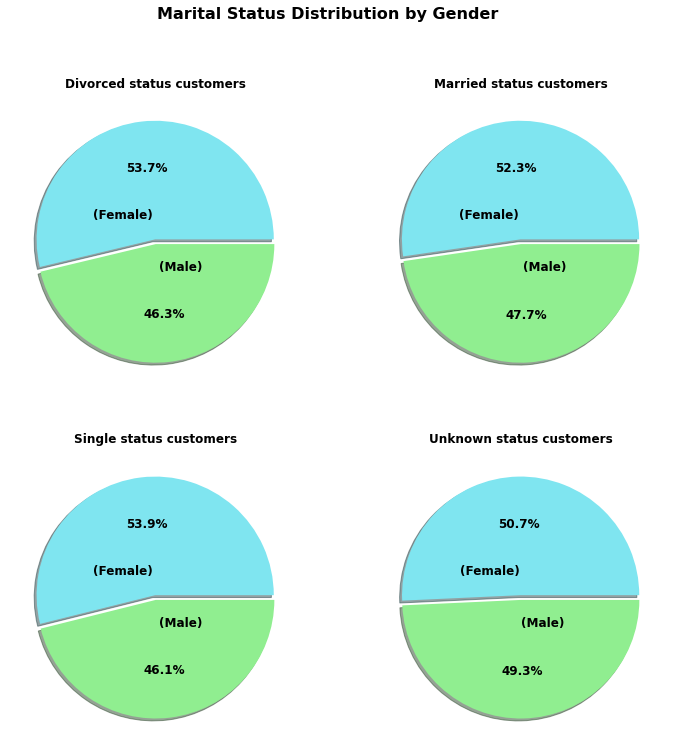

In [148]:
#@title
# Create a nested pie chart figure with the specified layout
fig, axs = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1.2, 1.2], 'height_ratios': [1.2, 1.2]}, figsize=(12, 12),
                        subplot_kw=dict(aspect="equal"))

# Define the positions of the subplots
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

counts = churn_data.groupby(['Marital_Status', 'Gender']).size()
explode = (0.02, 0.02)
# Loop through each marital status and create a pie chart
for i, (marital_status, status_counts) in enumerate(counts.groupby('Marital_Status')):
    # Create a pie chart for the current marital status
    labels = ['({})'.format('Male' if l[1]=='M' else 'Female', l[0]) for l in status_counts.index]
    colors = ['#7FE5F0','#90EE90'] if i in [0, 2, 6, 8] else ['#7FE5F0','#90EE90']
    axs[positions[i]].pie(status_counts, autopct='%1.1f%%',explode=explode,shadow=True, labels=labels, textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 12}, labeldistance=0.2, colors=colors)
    axs[positions[i]].set_title(marital_status + ' status customers', color='black', weight = 'bold')
    # adjust the vertical position of the labels
    texts[0].set_position((-0.25, 0))
    texts[1].set_position((0.15, 0.3))
# Remove the labels from the outer pie charts
for i in range(4):
    if i != 4:
        axs[positions[i]].set_ylabel('')
        axs[positions[i]].set_xlabel('')


# Add a title to the figure
fig.suptitle('Marital Status Distribution by Gender', color='black', weight='bold', fontsize=16)

# Set the background color to black

# Show the figure
plt.show()


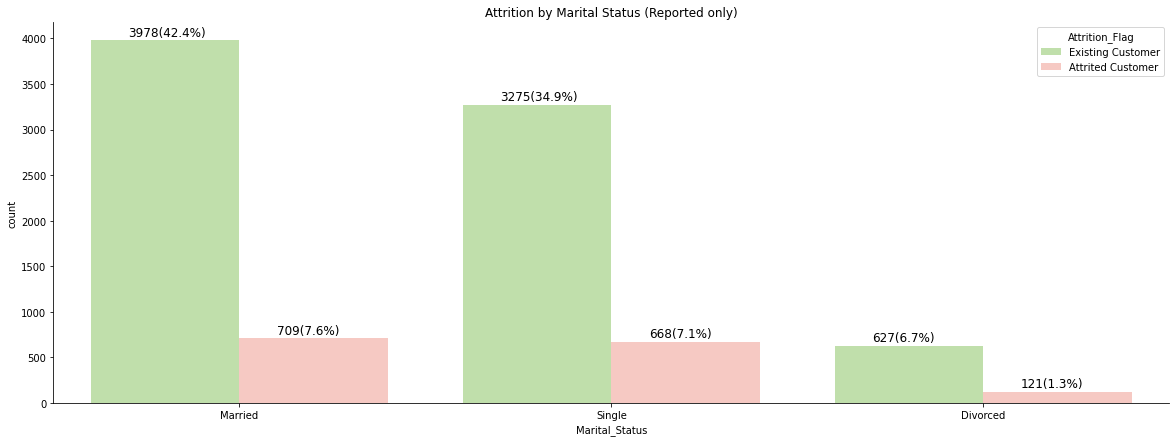

In [149]:
#@title
plt.figure(figsize=[20,7])
churn_data_1 = churn_data[churn_data['Marital_Status'] != 'Unknown'] # Remove 'Unknown' marital status
ax = sns.countplot(x='Marital_Status', hue='Attrition_Flag', palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'}, data=churn_data_1)
total = float(len(churn_data_1))

for p in ax.patches:
    percentage = '({:.1f}%)'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 50
    ax.annotate(str(int(p.get_height())) + percentage, (x, y), size=12)

plt.xlabel('Marital_Status')
plt.title('Attrition by Marital Status (Reported only)')
sns.despine()
plt.show();


In [150]:
#@title
from scipy.stats import chi2_contingency
from tabulate import tabulate

observed = pd.crosstab(churn_data_copy['Attrition_Flag'], [churn_data_copy['Gender'], churn_data_copy['Marital_Status']])

# Extract the counts for females by marital status
observed_female = observed.loc[:, ('F', ['Divorced', 'Married', 'Single'])]

# Extract the counts for males by marital status
observed_male = observed.loc[:, ('M', ['Divorced', 'Married', 'Single'])]

Odds_ratio_female_Divorced = (observed_female.iloc[1, 0])/(observed_female.iloc[0, 0])
Odds_ratio_female_Married = (observed_female.iloc[1, 1])/(observed_female.iloc[0, 1])
Odds_ratio_female_Single = (observed_female.iloc[1, 2])/(observed_female.iloc[0, 2])

chi2_f, pval_f, dof_f, expected_f = chi2_contingency(observed_female)

female_results = [["Female - Divorced", "{:.2f}".format(Odds_ratio_female_Divorced), "{:.2f}".format(chi2_f), "{:.4f}".format(pval_f), dof_f],
                  ["Female - Married", "{:.2f}".format(Odds_ratio_female_Married), "", "", ""],
                  ["Female - Single", "{:.2f}".format(Odds_ratio_female_Single), "", "", ""]]

Odds_ratio_male_Divorced = (observed_male.iloc[1, 0])/(observed_male.iloc[0, 0])
Odds_ratio_male_Married = (observed_male.iloc[1, 1])/(observed_male.iloc[0, 1])
Odds_ratio_male_Single = (observed_male.iloc[1, 2])/(observed_male.iloc[0, 2])

chi2_m, pval_m, dof_m, expected_m = chi2_contingency(observed_male)

male_results = [["Male - Divorced", "{:.2f}".format(Odds_ratio_male_Divorced), "{:.2f}".format(chi2_m), "{:.4f}".format(pval_m), dof_m],
                ["Male - Married", "{:.2f}".format(Odds_ratio_male_Married), "", "", ""],
                ["Male - Single", "{:.2f}".format(Odds_ratio_male_Single), "", "", ""]]

print(tabulate(female_results, headers=["Female - Marital Status", "Odds Ratio", "Chi-squared statistic", "p-value", "Degrees of freedom"], tablefmt="fancy_grid"))
print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print(tabulate(male_results, headers=["Male - Marital Status", "Odds Ratio", "Chi-squared statistic", "p-value", "Degrees of freedom"], tablefmt="fancy_grid"))


╒═══════════════════════════╤══════════════╤═════════════════════════╤═══════════╤══════════════════════╕
│ Female - Marital Status   │   Odds Ratio │ Chi-squared statistic   │ p-value   │ Degrees of freedom   │
╞═══════════════════════════╪══════════════╪═════════════════════════╪═══════════╪══════════════════════╡
│ Female - Divorced         │         0.2  │ 1.04                    │ 0.5938    │ 2                    │
├───────────────────────────┼──────────────┼─────────────────────────┼───────────┼──────────────────────┤
│ Female - Married          │         0.2  │                         │           │                      │
├───────────────────────────┼──────────────┼─────────────────────────┼───────────┼──────────────────────┤
│ Female - Single           │         0.22 │                         │           │                      │
╘═══════════════════════════╧══════════════╧═════════════════════════╧═══════════╧══════════════════════╛

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The chi-square test was conducted to investigate if there is an association between gender, marital status, and attrition rate for customers:

Almost half of the bank customers are married, and almost the entire other half are single customers. only about 8% of the customers are divorced, the marital status is evenly distributed between males and females

For females:

the chi-square statistic was 1.04 with 2 degrees of freedom and a p-value of 0.5938. Since the p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. Therefore, we can conclude that there is no significant association between marital status, and attrition rate for females.

For males:

the chi-square statistic was 5.29 with 2 degrees of freedom and a p-value of 0.0709. Since the p-value is slightly greater than the typical significance level of 0.05, we also fail to reject the null hypothesis for males. Therefore, we can conclude that there is no significant association between gender, marital status, and attrition rate for males.

In summary, based on these results, there is no significant association between gender, marital status, and attrition rate in this dataset

### **c) Imapcat of education level on attrition**

In [151]:
#@title

# Define a list of shades of blue for the pie chart slices
colors = ex.colors.sequential.algae        
# Create the pie chart figure
fig = ex.pie(churn_data, names='Education_Level', color_discrete_sequence=colors, title='Proportion Of Education Level', hole=0.33)

# Update the layout with custom styles
fig.update_layout(
    title={
        'text': 'Proportion Of Education_Level',
        'font': {
            'color': 'black',
            'size': 16
        },
        'x': 0.5,
        'y': 0.9
    },
    legend={
        'font': {
            'color': 'black'
        },
        'x': 0.75,
        'y': 0.5,
        'orientation': 'v'
    },
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# Update the pie chart slice colors
pie = fig.data[0]
pie.marker.colors = colors
fig.show()

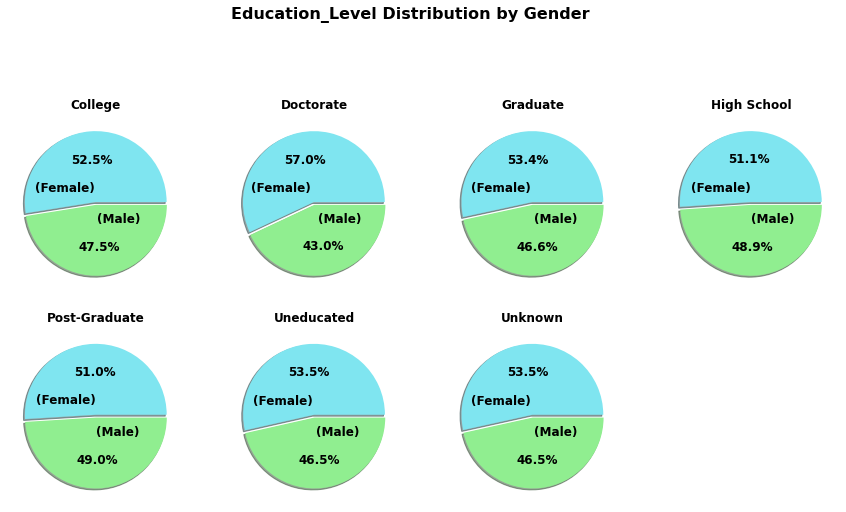

In [152]:
#@title
# Create a nested pie chart figure with the specified layout
fig, axs = plt.subplots(4, 4, gridspec_kw={'width_ratios': [1.5, 1.5,1.5, 1.5], 'height_ratios': [1.5, 1.5,1.5, 1.5]}, figsize=(15, 15),
                        subplot_kw=dict(aspect="equal"))

# Define the positions of the subplots
positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2),(1,3)]

counts = churn_data.groupby(['Education_Level', 'Gender']).size()
explode = (0.02, 0.02)
# Loop through each marital status and create a pie chart
for i, (Education_Level, status_counts) in enumerate(counts.groupby('Education_Level')):
    # Create a pie chart for the current marital status
    labels = ['({})'.format('Male' if l[1]=='M' else 'Female', l[0]) for l in status_counts.index]
    colors = ['#7FE5F0','#90EE90'] if i in [0, 2, 6, 8] else ['#7FE5F0','#90EE90']
    axs[positions[i]].pie(status_counts, autopct='%1.1f%%',explode=explode,shadow=True, labels=labels, textprops={'color': 'black', 'fontweight': 'bold', 'fontsize': 12}, labeldistance=0.2, colors=colors)
    axs[positions[i]].set_title(Education_Level , color='black', weight = 'bold')
    # adjust the vertical position of the labels
    texts[0].set_position((-0.25, 0))
    texts[1].set_position((0.15, 0.3))
# Remove the labels from the outer pie charts
for i in range(8):
    if i != 4:
        axs[positions[i]].set_ylabel('')
        axs[positions[i]].set_xlabel('')
axs[1, 3].remove()
axs[2, 0].remove()
axs[2, 1].remove()
axs[2, 2].remove()
axs[2, 3].remove()
axs[3, 0].remove()
axs[3, 1].remove()
axs[3, 2].remove()
axs[3, 3].remove()


# Add a title to the figure
fig.suptitle('Education_Level Distribution by Gender', color='black', weight='bold', fontsize=16)

# Set the background color to black

# Show the figure
plt.show()


In [153]:
#@title
from scipy.stats import chi2_contingency

# observed counts for females and males
observed_female = pd.crosstab(churn_data[churn_data_copy['Gender']=='F']['Attrition_Flag'], churn_data_copy[churn_data_copy['Gender']=='F']['Education_Level'].replace('Unknown', np.nan), dropna=False)
observed_male = pd.crosstab(churn_data[churn_data_copy['Gender']=='M']['Attrition_Flag'], churn_data_copy[churn_data_copy['Gender']=='M']['Education_Level'].replace('Unknown', np.nan), dropna=False)

# calculate the odds for females and males
odds_female = observed_female.iloc[0,:] / observed_female.iloc[1,:]
odds_male = observed_male.iloc[0,:] / observed_male.iloc[1,:]

chi2_female, pval_female, dof_female, expected_female = chi2_contingency(observed_female)
chi2_male, pval_male, dof_male, expected_male = chi2_contingency(observed_male)

# print results for females
print("Results for females:")
print(tabulate([["Odds of attrition for female with {} education level".format(level), "{:.2f}".format(odds)] for level, odds in odds_female.iteritems()], headers=['Education level', 'Odds'], tablefmt='fancy_grid'))
print(tabulate([["Chi-squared statistic", "{:.2f}".format(chi2_female)],
                ["p-value", "{:.4f}".format(pval_female)],
                ["Degrees of freedom", dof_female]], headers=['', ''], tablefmt='fancy_grid'))

# print results for males
print("Results for males:")
print(tabulate([["Odds of attrition for male with {} education level".format(level), "{:.2f}".format(odds)] for level, odds in odds_male.iteritems()], headers=['Education level', 'Odds'], tablefmt='fancy_grid'))
print(tabulate([["Chi-squared statistic", "{:.2f}".format(chi2_male)],
                ["p-value", "{:.4f}".format(pval_male)],
                ["Degrees of freedom", dof_male]], headers=['', ''], tablefmt='fancy_grid'))



Results for females:
╒═════════════════════════════════════════════════════════════════╤════════╕
│ Education level                                                 │   Odds │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Odds of attrition for female with College education level       │   0.17 │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Odds of attrition for female with Doctorate education level     │   0.33 │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Odds of attrition for female with Graduate education level      │   0.21 │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Odds of attrition for female with High School education level   │   0.2  │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Odds of attrition for female with Post-Graduate education level │   0.2  │
├──────────────────────────────────────────────────────

education level seems to be evenley distributed across data, About 35% have a higher level of education, and about 65% of the total customers have some  formal education level.

female customers:

the chi-squared statistic is 14.00 with a p-value of 0.0156 and degrees of freedom of 5. This means that there is a statistically significant association between education level and attrition for female customers.Looking at the odds of attrition for female customers, we can see that the odds of attrition are  highest for customers with a Doctorate education level (0.33) and lowest for customers with an Uneducated education level (0.19). This suggests that there is a positive relationship between education level and attrition for female customers, meaning that as education level increases, the odds of attrition also increase.

male customers:
the chi-squared statistic is 8.27 with a p-value of 0.1419 and degrees of freedom of 5. This means that we cannot reject the null hypothesis that there is no association between education level and attrition for male customers at the 0.05 significance level. However, looking at the odds of attrition for male customers, we can see that the odds of attrition are highest for customers with a Post-Graduate education level 

### **d) Impact of Income on attrition**

In [154]:
#@title
colors = ex.colors.sequential.Blugrn 
fig2 = ex.pie(churn_data,names='Income_Category',color_discrete_sequence=colors,title='Propotion Of Different Income Levels',hole=0.33)
fig2.update_layout(
    title={
        'text': 'Propotion Of Different Income Levels',
        'font': {
            'color': 'black',
            'size': 16
        },
        'x': 0.5,
        'y': 0.9
    },
    legend={
        'font': {
            'color': 'black'
        },
        'x': 0.75,
        'y': 0.5,
        'orientation': 'v'
    },
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)


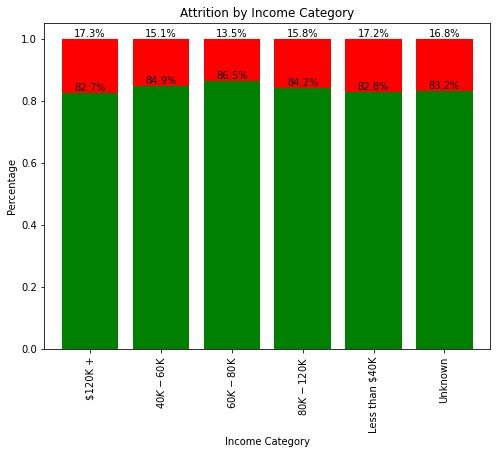

In [155]:
#@title

# Create a contingency table of the two variables
cont_table = pd.crosstab(churn_data['Income_Category'], churn_data['Attrition_Flag'])[['Existing Customer','Attrited Customer']]

# Calculate the percentage of each category
cont_table_pct = cont_table.div(cont_table.sum(axis=1), axis=0)

# Create a stacked bar chart with percentage labels
ax = cont_table_pct.plot(kind='bar', stacked=True, figsize=(8,6), width=0.8, legend=None, color=['green','red'])

# Set chart title and axis labels
plt.title("Attrition by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Percentage")

# Add percentage labels to each stack
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val*100:.1f}%' for val in i.datavalues])

# Show the chart
plt.show()


In [156]:
#@title
from scipy.stats import chi2_contingency
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Create a subset of the data containing only the Income Category and Attrition Flag columns
subset = churn_data_copy[['Income_Category', 'Attrition_Flag']]
# Calculate the total number of records in each Income Category level
income_counts = subset['Income_Category'].value_counts()
# Calculate the total number of Attrition occurrences in each Income Category level
attrition_counts = subset.groupby('Income_Category')['Attrition_Flag'].apply(lambda x: (x==1).sum())
# Calculate the odds of attrition for each income category level
odds = attrition_counts / (income_counts - attrition_counts)
# Create a list of tuples containing the income category levels and their corresponding odds of attrition
odds_data = [(level, odd) for level, odd in zip(income_counts.index, odds)]
# Print the odds of attrition in a fancy table
print(tabulate(odds_data, headers=['Income Category', 'Attrition Odds'], tablefmt='fancy_grid'))
print()
# Create a contingency table of the two variables
cont_table_1 = pd.crosstab(churn_data_copy['Income_Category'], churn_data_copy['Attrition_Flag'])


# Perform the chi-square test of independence
chi2, pval, dof, expected = chi2_contingency(cont_table_1)

# Create a table with the results
table = [['Chi-square statistic', chi2], ['p-value', pval], ['Degrees of freedom', dof], ['Expected values', expected]]

# Print the table
print(tabulate(table, headers=['Test', 'Value'], tablefmt='fancy_grid'))


╒═══════════════════╤══════════════════╕
│ Income Category   │   Attrition Odds │
╞═══════════════════╪══════════════════╡
│ Less than $40K    │         0.209651 │
├───────────────────┼──────────────────┤
│ $40K - $60K       │         0.178407 │
├───────────────────┼──────────────────┤
│ $80K - $120K      │         0.155812 │
├───────────────────┼──────────────────┤
│ $60K - $80K       │         0.187162 │
├───────────────────┼──────────────────┤
│ Unknown           │         0.207528 │
├───────────────────┼──────────────────┤
│ $120K +           │         0.202162 │
╘═══════════════════╧══════════════════╛

╒══════════════════════╤═════════════════════════════════╕
│ Test                 │ Value                           │
╞══════════════════════╪═════════════════════════════════╡
│ Chi-square statistic │ 12.832259274756895              │
├──────────────────────┼─────────────────────────────────┤
│ p-value              │ 0.025002425704390617            │
├──────────────────────┼──────

Based on the results of the analysis, we can make the following observations:

The odds of attrition are highest for customers with an income of over $120K 

followed by customers with an income of less than $40K.

The Chi-square statistic of 12.83 and the p-value of 0.025 indicate that there is a significant association between income category and attrition.
Overall, these results suggest that income category is a relevant factor for predicting attrition, and should be taken into account when developing strategies to retain customers. Companies may want to focus on improving their customer retention strategies for high-income customers, as they appear to be more likely to churn.

### **e) Association between age group and attrition**

In [157]:
#@title
# define the bin edges and labels
bin_edges = [18, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, np.inf]
bin_labels = ['18-21', '22-26', '27-31', '32-36', '37-41', '42-46', '47-51', '52-56', '57-61', '62-66', '67-71', '72-76', '77+']

# use pandas cut function to bin the age column
churn_data_copy['age_groups'] = pd.cut(churn_data_copy['Customer_Age'], bins=bin_edges, labels=bin_labels[:], include_lowest=True)

# check the counts of each group
churn_data_copy['age_groups'].value_counts()


42-46    2428
47-51    2193
37-41    1802
52-56    1458
32-36     938
57-61     627
27-31     352
62-66     215
22-26     110
67-71       3
72-76       1
18-21       0
77+         0
Name: age_groups, dtype: int64

In [158]:
churn_data_copy.age_groups.unique()

['42-46', '47-51', '37-41', '27-31', '32-36', ..., '52-56', '57-61', '67-71', '72-76', '22-26']
Length: 11
Categories (13, object): ['18-21' < '22-26' < '27-31' < '32-36' ... '62-66' < '67-71' < '72-76' < '77+']

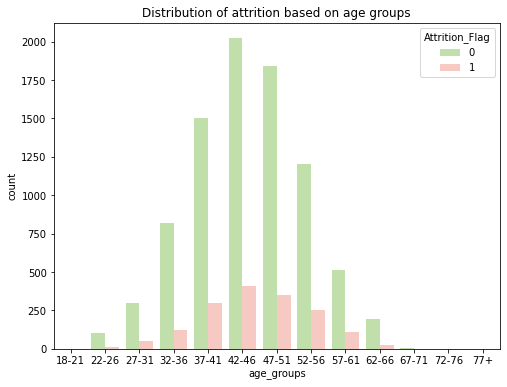

In [159]:
#@title
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# Map the labels back to 0 and 1
churn_data_copy_1 = churn_data_copy.copy()
# Define the labels
labels = ['Existing Customer', 'Attrited Customer']

# Map the labels to the Attrition_Flag column
churn_data_copy_1['Attrition_Flag'] = churn_data_copy_1['Attrition_Flag'].replace({0: 'Existing Customer', 1: 'Attrited Customer'})

# Define the color palette
colors = {0: '#BEE7A3', 1: '#FFC3BA'}

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# plot the countplot with the updated palette
sns.countplot(data=churn_data_copy, x='age_groups', hue='Attrition_Flag', palette=colors, ax=ax)

# set the plot title
ax.set_title('Distribution of attrition based on age groups')

# show the plot
plt.show()


In [160]:
#@title
from tabulate import tabulate

# Create a contingency table of observed counts
contingency_table = pd.crosstab(churn_data_copy['age_groups'], churn_data_copy['Attrition_Flag'])

# Perform the chi-squared test
chi2, p_value, dof, expected_counts = stats.chi2_contingency(contingency_table)

# Format the test results into a table
results_table = [["Test Statistic", "Degrees of Freedom", "p-value"],
                 [chi2, dof, p_value]]

# Print the table using tabulate
print(tabulate(results_table, headers='firstrow', tablefmt='fancy_grid'))


╒══════════════════╤══════════════════════╤═══════════╕
│   Test Statistic │   Degrees of Freedom │   p-value │
╞══════════════════╪══════════════════════╪═══════════╡
│          22.2082 │                   10 │ 0.0140784 │
╘══════════════════╧══════════════════════╧═══════════╛


Based on the provided contingency table, the chi-squared test results suggest that there is a significant association between age group and attrition. The chi-squared test statistic value is 22.208 and the corresponding p-value is 0.014, which is less than the commonly used significance level of 0.05.

Therefore, we can reject the null hypothesis that there is no association between age group and attrition, and conclude that there is evidence to suggest that the distribution of attrition varies significantly across different age groups.

Looking at the provided contingency table, we can see that the proportion of customers who have churned (i.e., Attrition_Flag = 1) tends to increase as the age group increases, up until the 47-51 age group. After that, the proportion of churned customers decreases. For example, the proportion of churned customers in the 22-26 age group is 8.2%, while it is 42.2% in the 47-51 age group, and then it decreases to 17.4% in the 62-66 age group.

There could be many reasons for this relationship. For example, younger customers may be more likely to switch companies for better deals or job opportunities, while older customers may be more loyal or have fewer options available to them. Additionally, different age groups may have different preferences or needs when it comes to banking services

### **Conclusion**

Based on the analysis, what factors were found to be significantly associated with attrition rate in this dataset?

Gender: Females were found to be churning at a higher rate than males, with a statistically significant relationship between gender and attrition.

Marital Status: There was no significant association found between marital status and attrition rate for both males and females.

Education Level: There was a statistically significant association found between education level and attrition for female customers, with higher odds of attrition for customers with a higher education level.

Income Category: There was a significant association found between income category and attrition, with the odds of attrition being highest for customers with an income of over $120K.

Age Group: There was a significant association found between age group and attrition, with the proportion of churned customers increasing as age group increases up until the 47-51 age group, and then decreasing after that.




## ***2) How does the length of the customer relationship impact churn? Are long-term customers less likely to churn than newer customers?***

### **a) Association between tenure and attrition**

In [222]:
#@title
# create the bins
bins = [0, 12, 25, 37, 48, 60, 61]

# create the labels for the bins
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61+']

# apply the bins to the tenure column
churn_data_copy['tenure_groups'] = pd.cut(churn_data_copy['Months_on_book'], bins=bins, labels=labels)
churn_data_copy['tenure_groups'].value_counts()


25-36    5611
37-48    2849
13-24    1012
49-60     655
0-12        0
61+         0
Name: tenure_groups, dtype: int64

In [223]:
churn_data_copy.Attrition_Flag.unique()

array([0, 1])

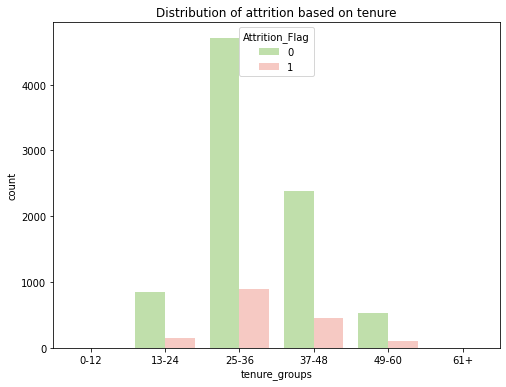

In [224]:
#@title
from scipy.stats import chi2_contingency
churn_data_copy_2 = churn_data_copy.copy()
# Define the labels
labels = ['Existing Customer', 'Attrited Customer']

# Map the labels to the Attrition_Flag column
churn_data_copy_2['Attrition_Flag'] = churn_data_copy_2['Attrition_Flag'].map({0: 'Existing Customer', 1: 'Attrited Customer'})

# Define the color palette
colors = {0: '#BEE7A3', 1:  '#FFC3BA'}

fig, ax = plt.subplots(figsize=(8, 6))


# set the plot title
plt.title('Distribution of Attrition based on tenure')
# plot the countplot with the updated palette

sns.countplot(data=churn_data_copy, x='tenure_groups', hue='Attrition_Flag', palette=colors, ax=ax)

# set the plot title
ax.set_title('Distribution of attrition based on tenure')

# show the plot
plt.show()



In [225]:
#@title
import tabulate

# create a contingency table
cont_table = pd.crosstab(churn_data_copy['tenure_groups'], churn_data['Attrition_Flag'])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

# format the test results in a table
table = [["Chi-squared test results for Distribution of attrition based on tenure"],
         ["chi2", f"{chi2:.2f}"],
         ["p-value", f"{p:.4f}"],
         ["degrees of freedom", dof]]
table_str = tabulate.tabulate(table, tablefmt='fancy_grid')

# print the table
print(table_str)



╒════════════════════════════════════════════════════════════════════════╤════════╕
│ Chi-squared test results for Distribution of attrition based on tenure │        │
├────────────────────────────────────────────────────────────────────────┼────────┤
│ chi2                                                                   │ 0.61   │
├────────────────────────────────────────────────────────────────────────┼────────┤
│ p-value                                                                │ 0.8948 │
├────────────────────────────────────────────────────────────────────────┼────────┤
│ degrees of freedom                                                     │ 3      │
╘════════════════════════════════════════════════════════════════════════╧════════╛


The chi-squared test statistic value is 0.61 and the corresponding p-value is 08948. 

This test result suggests that there is no significant association between the distribution of attrition and tenure, as the p-value is much greater than the commonly used significance level of 0.05. In summary, the test results indicate that there is no significant relationship between attrition and tenure in the given data set.

### **b) Association between Gender and tenure**

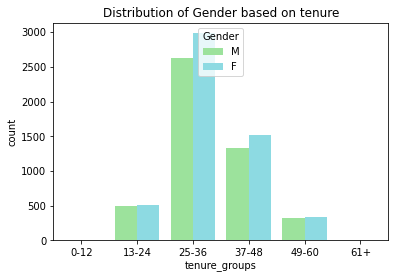

In [226]:
#@title

from scipy.stats import chi2_contingency

# define the color palette
colors = {'F': '#7FE5F0', 'M': '#90EE90'} 

# plot the countplot with the updated palette
sns.countplot(data=churn_data_copy, x='tenure_groups', hue='Gender', palette=colors)

# set the plot title
plt.title('Distribution of Gender based on tenure')

# show the plot
plt.show()



In [227]:
#@title
from tabulate import tabulate
from scipy.stats import chi2_contingency

# create a contingency table
cont_table = pd.crosstab(churn_data_copy['tenure_groups'], churn_data_copy['Gender'])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

# print the test results
print('Chi-squared test results for Distribution of Gender based on tenure :')
table = [['Gender', 'Observed count (Female)', 'Observed count (Male)', 'Expected count (Female)', 'Expected count (Male)'],
         ['Female', cont_table.iloc[0, 0], cont_table.iloc[1, 0], expected[0][0], expected[1][0]],
         ['Male', cont_table.iloc[0, 1], cont_table.iloc[1, 1], expected[0][1], expected[1][1]]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print(f'chi2 = {chi2:.2f}, p-value = {p:.4f}, dof = {dof}')


Chi-squared test results for Distribution of Gender based on tenure :
╒══════════╤═══════════════════════════╤═════════════════════════╤═══════════════════════════╤═════════════════════════╕
│ Gender   │   Observed count (Female) │   Observed count (Male) │   Expected count (Female) │   Expected count (Male) │
╞══════════╪═══════════════════════════╪═════════════════════════╪═══════════════════════════╪═════════════════════════╡
│ Female   │                       516 │                    2984 │                    535.43 │                 2968.67 │
├──────────┼───────────────────────────┼─────────────────────────┼───────────────────────────┼─────────────────────────┤
│ Male     │                       496 │                    2627 │                    476.57 │                 2642.33 │
╘══════════╧═══════════════════════════╧═════════════════════════╧═══════════════════════════╧═════════════════════════╛
chi2 = 2.34, p-value = 0.5052, dof = 3


The results of the chi-squared test between gender and tenure suggest that there is no significant relationship between these two variables.

The chi-squared statistic for this test is 2.34, which means that the observed counts in the contingency table differ from the expected counts by this amount. However, the p-value for the test is 0.5052, which indicates that there is a 50.52% probability of observing a chi-squared statistic as large as 2.34 or larger, assuming that the null hypothesis (i.e., the absence of a significant relationship between gender and tenure) is true.

Therefore, we can conclude that there is no significant relationship between gender and tenure based on the results of this test.

### **Conclusion**

Based on the results of both tests, we can conclude that there is no significant relationship between attrition and tenure, as well as between gender and tenure in the given dataset. The p-values for both tests are greater than the commonly used significance level of 0.05, indicating that there is no evidence to reject the null hypothesis that there is no significant association between these variables.

##***3) Is there a relationship between the amount of products or services a customer uses and their likelihood of churning?***

### **a) Attrition based on number of products held**

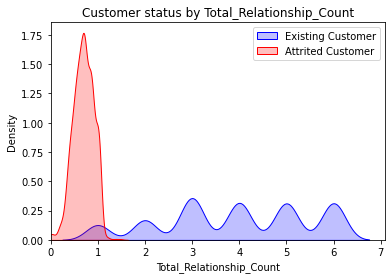

In [167]:
#@title
fig, ax = plt.subplots()
Mth = sns.kdeplot(churn_data.Total_Relationship_Count[(churn_data["Attrition_Flag"] == 'Existing Customer')],
                  color="Blue", fill=True, ax=ax)
Mth = sns.kdeplot(churn_data.Total_Amt_Chng_Q4_Q1[(churn_data["Attrition_Flag"] == 'Attrited Customer')],
                  color="Red", fill=True, ax=ax)
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total_Relationship_Count')
Mth.set_title('Customer status by Total_Relationship_Count')
Mth.set(xlim=(0, None))

plt.show()
print()



In [168]:
#@title
# create a contingency table
contingency_table = pd.crosstab(churn_data['Total_Relationship_Count'], churn_data['Attrition_Flag'])

# perform the chi-squared test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# format the test results in a table
table = [["Chi-squared test results for Distribution of attrition based on number of products held"],
         ["chi2", f"{chi2_stat:.2f}"],
         ["p-value", f"{p_value:.4f}"],
         ["degrees of freedom", dof]]
table_str = tabulate(table, tablefmt='fancy_grid')
print(table_str)

╒═════════════════════════════════════════════════════════════════════════════════════════╤════════╕
│ Chi-squared test results for Distribution of attrition based on number of products held │        │
├─────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ chi2                                                                                    │ 284.07 │
├─────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ p-value                                                                                 │   0    │
├─────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ degrees of freedom                                                                      │   5    │
╘═════════════════════════════════════════════════════════════════════════════════════════╧════════╛


By observing the total no. of products held by the customer there an idication that a rise in th no. of products, the less likelihood there is to churn, The chi-squared test suggests that there is a significant relationship between Total_Relationship_Count and the Attrition_Flag. The p-value is very small (0.0000), which means that we can reject the null hypothesis and conclude that there is evidence of a relationship between these two variables. This correlation indicates that as expected having higher number of banking products suggest the less likelihood to churn, this correlation can be observed in various scenarios. And could indicate the customer loyalty and love for the service the company offers.



### **b) Customer status by Total_Revolving_Bal**

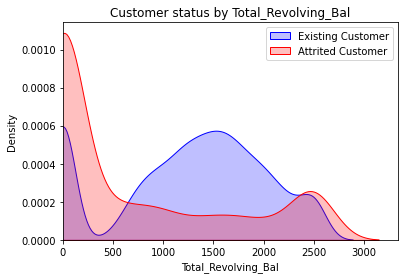

In [169]:
#@title
fig, ax = plt.subplots()
Mth = sns.kdeplot(churn_data.Total_Revolving_Bal[(churn_data["Attrition_Flag"] == 'Existing Customer')],
                  color="Blue", fill=True, ax=ax)
Mth = sns.kdeplot(churn_data.Total_Revolving_Bal[(churn_data["Attrition_Flag"] == 'Attrited Customer')],
                  color="Red", fill=True, ax=ax)
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total_Revolving_Bal')
Mth.set_title('Customer status by Total_Revolving_Bal')
Mth.set(xlim=(0, None))

plt.show()
print()


In [170]:
#@title
import scipy.stats as stats
from tabulate import tabulate

# Split data into two groups based on Attrition_Flag
existing_cust = churn_data[churn_data['Attrition_Flag'] == 'Existing Customer']['Total_Revolving_Bal']
attrited_cust = churn_data[churn_data['Attrition_Flag'] == 'Attrited Customer']['Total_Revolving_Bal']

# Compute the means of Total_Revolving_Bal for each group
existing_mean = existing_cust.mean()
attrited_mean = attrited_cust.mean()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(existing_cust, attrited_cust, equal_var=False)

# Format the results as a table
table = [['Existing Customer mean', f"{existing_mean:.2f}"],
         ['Attrited Customer mean', f"{attrited_mean:.2f}"],
         ['t-statistic', f"{t_stat:.2f}"],
         ['p-value', f"{p_value:.4f}"]]
table_str = tabulate(table, headers=['', ''], tablefmt='fancy_grid')

# Print the results
print('Results of Two-Sample t-test for Total_Revolving_Bal')
print(table_str)


Results of Two-Sample t-test for Total_Revolving_Bal
╒════════════════════════╤═════════╕
│                        │         │
╞════════════════════════╪═════════╡
│ Existing Customer mean │ 1256.6  │
├────────────────────────┼─────────┤
│ Attrited Customer mean │  672.82 │
├────────────────────────┼─────────┤
│ t-statistic            │   24.05 │
├────────────────────────┼─────────┤
│ p-value                │    0    │
╘════════════════════════╧═════════╛


Based on the results of the two-sample t-test, we can conclude that there is a statistically significant difference in the means of Total_Revolving_Bal between existing and attrited customers. The t-statistic of 24.05 indicates a large difference between the means, and the p-value of 0.0000 indicates that the probability of observing such a difference by chance is extremely low.

We can also see from the means that the average Total_Revolving_Bal for existing customers is higher than that of attrited customers. This suggests that customers with higher revolving balances are less likely to churn. 

 This results suggests that customers with higher revolving balances are less likely to churn. we can assume that when a customer's revolving balance is low, it could indicate that they are not using their credit card frequently or are paying off their balances regularly. In this case, the credit card company or bank may not be earning as much interest or fees from that customer, which could make them less profitable. Therefore, the credit card company or bank may be less motivated to retain that customer, and the likelihood of churn could increase.


### **c) Customer status based Total count change Q1-4,Total amount change Q1-4, and Total utilization ratio**

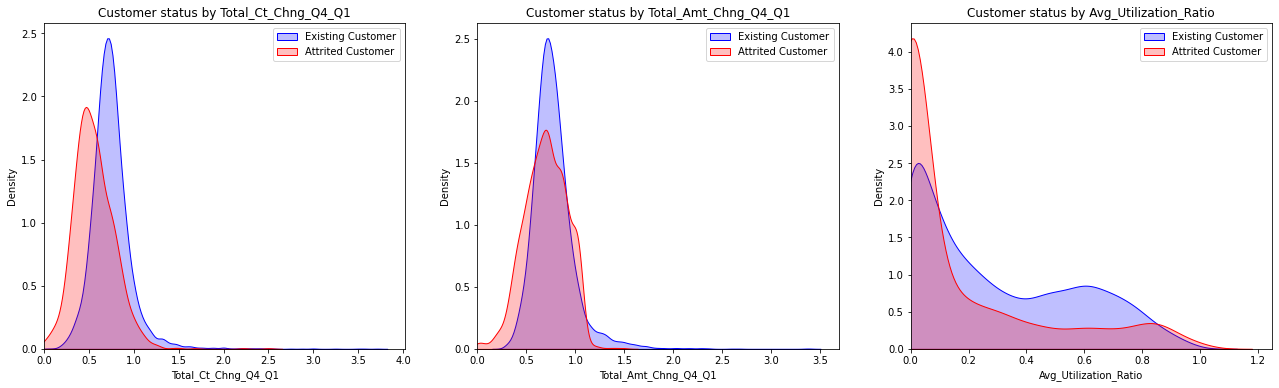

In [171]:
import scipy.stats as stats
#@title
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

Mth = sns.kdeplot(churn_data_copy.Total_Ct_Chng_Q4_Q1[(churn_data_copy["Attrition_Flag"] == 0)],
                  color="Blue", fill=True,  ax=axes[0])
Mth = sns.kdeplot(churn_data_copy.Total_Ct_Chng_Q4_Q1[(churn_data_copy["Attrition_Flag"] == 1)],
                  color="Red", fill=True,  ax=axes[0])
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total_Ct_Chng_Q4_Q1')
Mth.set_title('Customer status by Total_Ct_Chng_Q4_Q1')
Mth.set(xlim=(0, None))

Mth = sns.kdeplot(churn_data_copy.Total_Amt_Chng_Q4_Q1[(churn_data_copy["Attrition_Flag"] == 0)],
                  color="Blue", fill=True, ax=axes[1])
Mth = sns.kdeplot(churn_data_copy.Total_Amt_Chng_Q4_Q1[(churn_data_copy["Attrition_Flag"] == 1)],
                  color="Red", fill=True, ax=axes[1])
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total_Amt_Chng_Q4_Q1')
Mth.set_title('Customer status by Total_Amt_Chng_Q4_Q1')
Mth.set(xlim=(0, None))

Mth = sns.kdeplot(churn_data_copy.Avg_Utilization_Ratio[(churn_data_copy["Attrition_Flag"] == 0)],
                  color="Blue", fill=True, ax=axes[2])
Mth = sns.kdeplot(churn_data_copy.Avg_Utilization_Ratio[(churn_data_copy["Attrition_Flag"] == 1)],
                  color="Red", fill=True, ax=axes[2])
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Avg_Utilization_Ratio')
Mth.set_title('Customer status by Avg_Utilization_Ratio')
Mth.set(xlim=(0, None));
plt.show()


In [172]:
#@title
import scipy.stats as stats
from tabulate import tabulate

# Calculate point-biserial correlation coefficient and p-value for Total_Ct_Chng_Q4_Q1
corr_ct, pval_ct = stats.pointbiserialr(churn_data_copy['Attrition_Flag'], churn_data_copy['Total_Ct_Chng_Q4_Q1'])
print("Point-biserial correlation coefficient and p-value for Total_Ct_Chng_Q4_Q1:")
table = [["Correlation coefficient:", corr_ct],
         ["p-value:", pval_ct]]
print(tabulate(table, headers=["", "Total_Ct_Chng_Q4_Q1"],tablefmt='fancy_grid'))

# Calculate point-biserial correlation coefficient and p-value for Total_Amt_Chng_Q4_Q1
corr_amt, pval_amt = stats.pointbiserialr(churn_data_copy['Attrition_Flag'], churn_data_copy['Total_Amt_Chng_Q4_Q1'])
print("Point-biserial correlation coefficient and p-value for Total_Amt_Chng_Q4_Q1:")
table = [["Correlation coefficient:", corr_amt],
         ["p-value:", pval_amt]]
print(tabulate(table, headers=["", "Total_Amt_Chng_Q4_Q1"],tablefmt='fancy_grid'))

# Calculate point-biserial correlation coefficient and p-value for Avg_Utilization_Ratio
corr_ratio, pval_ratio = stats.pointbiserialr(churn_data_copy['Attrition_Flag'], churn_data_copy['Avg_Utilization_Ratio'])
print("Point-biserial correlation coefficient and p-value for Avg_Utilization_Ratio:")
table = [["Correlation coefficient:", corr_ratio],
         ["p-value:", pval_ratio]]
print(tabulate(table, headers=["", "Avg_Utilization_Ratio"],tablefmt='fancy_grid'))


Point-biserial correlation coefficient and p-value for Total_Ct_Chng_Q4_Q1:
╒══════════════════════════╤═══════════════════════╕
│                          │   Total_Ct_Chng_Q4_Q1 │
╞══════════════════════════╪═══════════════════════╡
│ Correlation coefficient: │         -0.290054     │
├──────────────────────────┼───────────────────────┤
│ p-value:                 │          1.64772e-195 │
╘══════════════════════════╧═══════════════════════╛
Point-biserial correlation coefficient and p-value for Total_Amt_Chng_Q4_Q1:
╒══════════════════════════╤════════════════════════╕
│                          │   Total_Amt_Chng_Q4_Q1 │
╞══════════════════════════╪════════════════════════╡
│ Correlation coefficient: │           -0.131063    │
├──────────────────────────┼────────────────────────┤
│ p-value:                 │            4.83664e-40 │
╘══════════════════════════╧════════════════════════╛
Point-biserial correlation coefficient and p-value for Avg_Utilization_Ratio:
╒═══════════════════

For Total_Ct_Chng_Q4_Q1, the correlation coefficient is -0.290, indicating a moderately strong negative relationship between the variable and the Attrition_Flag. This suggests that as the Total_Ct_Chng_Q4_Q1 increases, the likelihood of the customer churning decreases. The p-value is very small (1.65e-195), which indicates that this relationship is statistically significant.

For Total_Amt_Chng_Q4_Q1, the correlation coefficient is -0.131, indicating a weak negative relationship between the variable and the Attrition_Flag. This suggests that as the Total_Amt_Chng_Q4_Q1 increases, the likelihood of the customer churning decreases, but the relationship is not as strong as in the case of Total_Ct_Chng_Q4_Q1. The p-value is also very small (4.84e-40), indicating that this relationship is statistically significant.

For Avg_Utilization_Ratio, the correlation coefficient is -0.178, indicating a moderate negative relationship between the variable and the Attrition_Flag. This suggests that as the Avg_Utilization_Ratio increases, the likelihood of the customer churning decreases. The p-value is very small (3.36e-73), indicating that this relationship is statistically significant.

### **d) Customer status by Total_Trans_Ct, Total_Trans_amt**

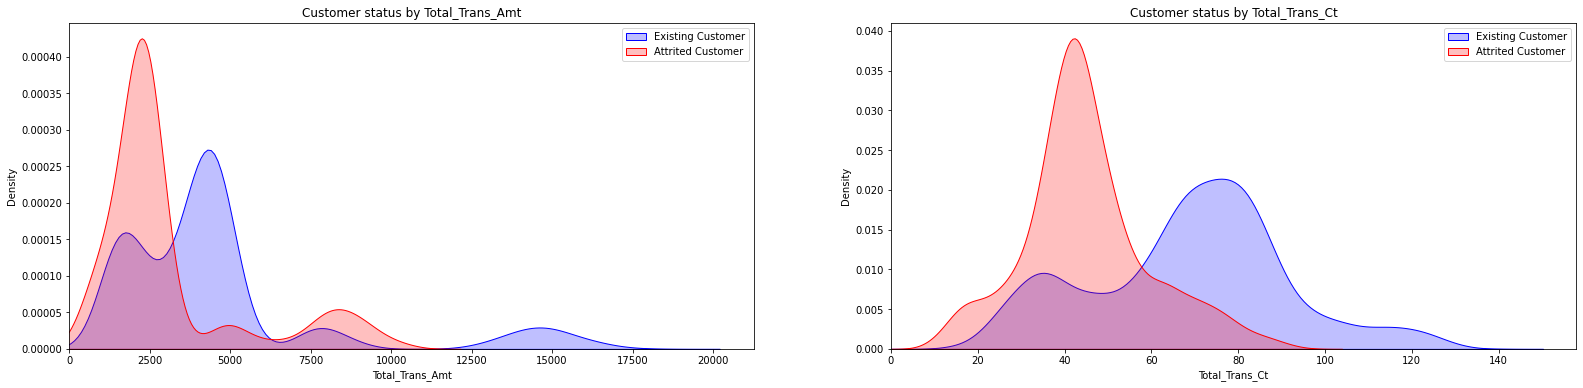

In [173]:
#@title
fig, axes = plt.subplots(1, 2, figsize=(27, 6))

Mth = sns.kdeplot(churn_data_copy.Total_Trans_Amt[(churn_data_copy["Attrition_Flag"] == 0)],
                  color="Blue", fill=True,  ax=axes[0])
Mth = sns.kdeplot(churn_data_copy.Total_Trans_Amt[(churn_data_copy["Attrition_Flag"] == 1)],
                  color="Red", fill=True,  ax=axes[0])
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total_Trans_Amt')
Mth.set_title('Customer status by Total_Trans_Amt')
Mth.set(xlim=(0, None))

Mth = sns.kdeplot(churn_data_copy.Total_Trans_Ct[(churn_data_copy["Attrition_Flag"] == 0)],
                  color="Blue", fill=True, ax=axes[1])
Mth = sns.kdeplot(churn_data_copy.Total_Trans_Ct[(churn_data_copy["Attrition_Flag"] == 1)],
                  color="Red", fill=True, ax=axes[1])
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total_Trans_Ct')
Mth.set_title('Customer status by Total_Trans_Ct')
Mth.set(xlim=(0, None))

plt.show()

In [174]:
#@title
import tabulate

# Calculate point-biserial correlation coefficient and p-value for Total_Trans_Amt
corr_ratio, pval_ratio = stats.pointbiserialr(churn_data_copy['Attrition_Flag'], churn_data_copy['Total_Trans_Amt'])

# Calculate point-biserial correlation coefficient and p-value for Total_Trans_Ct
corr_amt, pval_amt = stats.pointbiserialr(churn_data_copy['Attrition_Flag'], churn_data_copy['Total_Trans_Ct'])

# Format the results as a table
table = [["Total_Trans_Amt", corr_ratio, pval_ratio],
         ["Total_Trans_Ct", corr_amt, pval_amt]]

# Print the table
print(tabulate.tabulate(table, headers=["Variable", "Correlation coefficient", "p-value"], tablefmt='fancy_grid'))


╒═════════════════╤═══════════════════════════╤═════════════╕
│ Variable        │   Correlation coefficient │     p-value │
╞═════════════════╪═══════════════════════════╪═════════════╡
│ Total_Trans_Amt │                 -0.168598 │ 1.85744e-65 │
├─────────────────┼───────────────────────────┼─────────────┤
│ Total_Trans_Ct  │                 -0.371403 │ 0           │
╘═════════════════╧═══════════════════════════╧═════════════╛


variables like count of transaction and amount  are a useful idicators to the client engagemnt , and thus for churn prediction. as we can see Existing Customers seems to be higher on all actions.
the  test results show the following:

For Total_Trans_Amt, the point-biserial correlation coefficient is -0.1686, which indicates a weak negative association between Total_Trans_Amt and Attrition_Flag. The p-value is very small (1.8574e-65), indicating strong evidence against the null hypothesis and concluding that there is a significant association between Total_Trans_Amt and Attrition_Flag.

For Total_Trans_Ct, the point-biserial correlation coefficient is -0.3714, which indicates a moderate negative association between Total_Trans_Ct and Attrition_Flag. The p-value is 0.0, indicating extremely strong evidence against the null hypothesis and concluding that there is a significant association between Total_Trans_Ct and Attrition_Flag.

Overall, the results suggest that both Total_Trans_Amt and Total_Trans_Ct are negatively associated with Attrition_Flag, which means that customers who churn tend to have lower values for these variables. The strength of the association is stronger for Total_Trans_Ct than for Total_Trans_Amt.





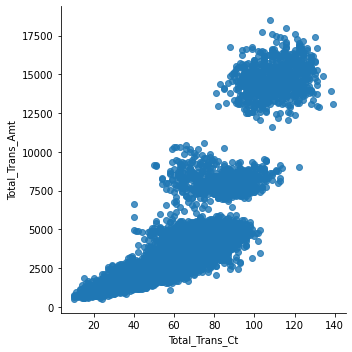

In [175]:
#@title
sns.lmplot(data=churn_data_copy, x='Total_Trans_Ct', y='Total_Trans_Amt', fit_reg=False)


As Total_Trans_Ct increase as Total_Trans_Amt increase,  as a credit card company we may observe a similar correlation between these two variables. As their customers spend more money using their credit cards, they are likely to make more transactions, resulting in an increase in the total transaction amount and the total number of transactions, witch are useful indicators of customer engagement, and therefore, they can be used as predictors of churn

### **Conclusion**

In summary, the analysis suggests that several variables are significantly associated with customer churn in the banking dataset. The number of banking products held by the customer, the total revolving balance, the change in the total number of transactions, the change in the total transaction amount, and the average utilization ratio are all found to have significant correlations with customer churn.

The analysis also suggests that customers who hold a higher number of banking products, have a higher revolving balance, have a higher number of transactions, and a higher transaction amount are less likely to churn. These findings may help the bank in developing strategies to retain customers and improve customer loyalty.

##***4) How does the customer's interaction with the bank, such as frequency of calls, impact churn?***

### **a) Attrition based on number of calles made in the past 12 months**

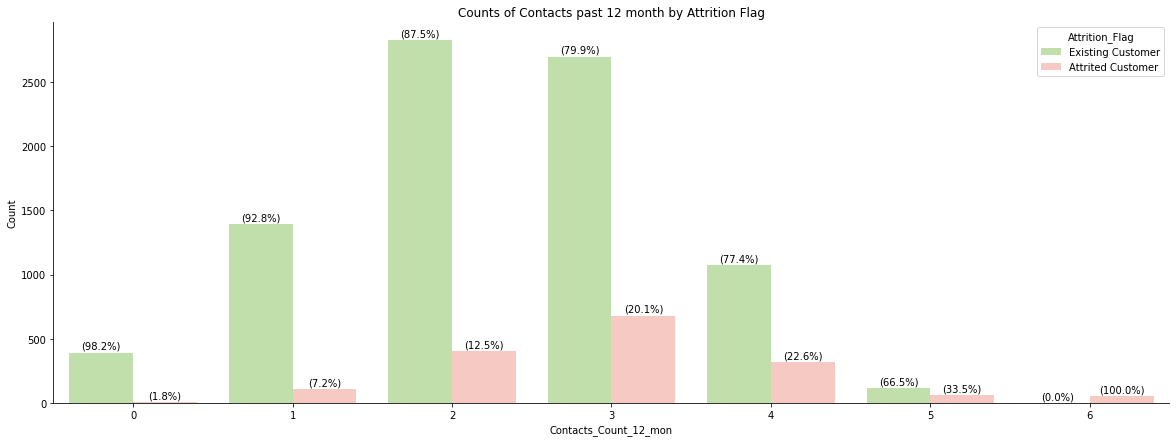

In [186]:
#@title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=[20,7])
ax = sns.countplot(x='Contacts_Count_12_mon', hue='Attrition_Flag', palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'}, data=churn_data)

for i in range(len(ax.patches)//2):
    total = float(ax.patches[i].get_height() + ax.patches[i+len(ax.patches)//2].get_height())
    for j, p in enumerate([ax.patches[i], ax.patches[i+len(ax.patches)//2]]):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 50
        ax.annotate(f'({percentage})', (x, y), size=10, ha='center', va='center')

plt.xlabel('Contacts_Count_12_mon')
plt.ylabel('Count')
plt.title('Counts of Contacts past 12 month by Attrition Flag')
sns.despine()
plt.show()

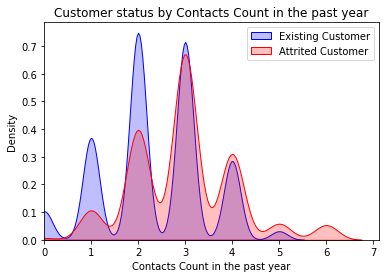

In [187]:
#@title
from scipy.stats import chi2_contingency

fig, ax = plt.subplots()
Mth = sns.kdeplot(churn_data.Contacts_Count_12_mon[(churn_data["Attrition_Flag"] == 'Existing Customer')],
                  color="Blue", fill=True, ax=ax)
Mth = sns.kdeplot(churn_data.Contacts_Count_12_mon[(churn_data["Attrition_Flag"] == 'Attrited Customer')],
                  color="Red", fill=True, ax=ax)
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Contacts Count in the past year')
Mth.set_title('Customer status by Contacts Count in the past year')
Mth.set(xlim=(0, None))

plt.show()



In [188]:
#@title
import tabulate as tb

# create a contingency table
cont_table = pd.crosstab(churn_data_copy['Contacts_Count_12_mon'], churn_data['Attrition_Flag'])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

# format the test results in a table
table = [["Chi-squared test results for Distribution of attrition based on number of products held"],
         ["chi2", f"{chi2:.2f}"],
         ["p-value", f"{p:.4f}"],
         ["degrees of freedom", dof]]
table_str = tb.tabulate(table, tablefmt='fancy_grid')
print(table_str)

╒═════════════════════════════════════════════════════════════════════════════════════════╤════════╕
│ Chi-squared test results for Distribution of attrition based on number of products held │        │
├─────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ chi2                                                                                    │ 586.64 │
├─────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ p-value                                                                                 │   0    │
├─────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ degrees of freedom                                                                      │   6    │
╘═════════════════════════════════════════════════════════════════════════════════════════╧════════╛


The results of the Chi-squared test indicate that there is a significant association between the distribution of attrition and the contacts count in the last 12 month.

The chi-squared statistic of 586.64 with 6 degrees of freedom (dof) indicates a large deviation from the expected values under the null hypothesis of no association between the variables. The p-value of 0.0000 indicates that the probability of observing such a large chi-squared statistic by chance alone is very low.

Looking at the table, it seems that customers who had fewer contacts in the last 12 months (0-3) were more likely to leave the company, while customers who had more contacts (4-6) were more likely to be stay. 

Therefore, we can reject the null hypothesis and conclude that there is a statistically significant association between the distribution of attrition and contacts count in the last year.


### **b) Is customer inactivity a significant predictor of customer attrition?**

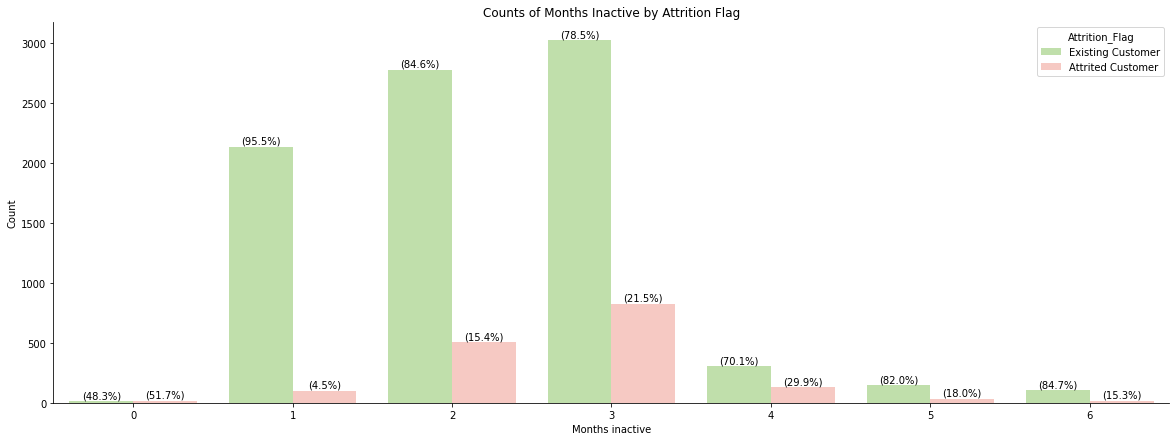

In [189]:
#@title
plt.figure(figsize=[20,7])
ax = sns.countplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'}, data=churn_data)

for i in range(len(ax.patches)//2):
    total = float(ax.patches[i].get_height() + ax.patches[i+len(ax.patches)//2].get_height())
    for j, p in enumerate([ax.patches[i], ax.patches[i+len(ax.patches)//2]]):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 50
        ax.annotate(f'({percentage})', (x, y), size=10, ha='center', va='center')

plt.xlabel('Months inactive')
plt.ylabel('Count')
plt.title('Counts of Months Inactive by Attrition Flag')
sns.despine()
plt.show()


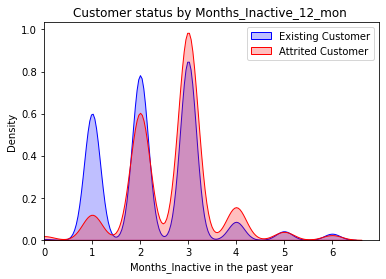

In [190]:
#@title
fig, ax = plt.subplots()
Mth = sns.kdeplot(churn_data.Months_Inactive_12_mon[(churn_data["Attrition_Flag"] == 'Existing Customer')],
                  color="Blue", fill=True, ax=ax)
Mth = sns.kdeplot(churn_data.Months_Inactive_12_mon[(churn_data["Attrition_Flag"] == 'Attrited Customer')],
                  color="Red", fill=True, ax=ax)
Mth.legend(["Existing Customer", "Attrited Customer"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Months_Inactive in the past year')
Mth.set_title('Customer status by Months_Inactive_12_mon ')
Mth.set(xlim=(0, None))

plt.show()



In [191]:
import pandas as pd
from scipy.stats import chi2_contingency
from tabulate import tabulate

# create a contingency table
cont_table = pd.crosstab(churn_data_copy['Months_Inactive_12_mon'], churn_data['Attrition_Flag'])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

# print the test results

table = [['Chi-squared test results for Distribution of attrition based on Months Inactive in the last year:'],
         ["chi2", f"{chi2:.2f}"],
         ["p-value", f"{p:.4f}"],
         ["degrees of freedom", dof]]
table_str = tabulate(table, tablefmt='fancy_grid')
print(table_str)
print()
print('Observed table')
print(tabulate(cont_table, headers='keys', tablefmt='fancy_grid'))
print()
print('\nExpected table')
expected_df = pd.DataFrame(expected, columns=cont_table.columns)
expected_df.insert(0, 'Months_Inactive_12_mon', range(0, 7))
print(tabulate(expected_df, headers='keys', tablefmt='fancy_grid'))



╒═══════════════════════════════════════════════════════════════════════════════════════════════════╤════════╕
│ Chi-squared test results for Distribution of attrition based on Months Inactive in the last year: │        │
├───────────────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ chi2                                                                                              │ 396.46 │
├───────────────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ p-value                                                                                           │   0    │
├───────────────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ degrees of freedom                                                                                │   6    │
╘═══════════════════════════════════════════════════════════════════════════════════════════════════╧════════╛



Based on the results of the Chi-squared test for Distribution of attrition based on Months Inactive in the last year, it appears that there is a significant association between attrition status and months inactive.

The Chi-squared statistic of 396.46 with 6 degrees of freedom (dof) indicates a significant deviation from what would be expected under the null hypothesis of no association between the variables. The p-value of 0.0000 indicates that the probability of observing such a large chi-squared statistic by chance alone is very low, which means that we can reject the null hypothesis and conclude that there is a significant association between attrition status and months inactive.

Looking at the expected values, we can see that there are some cells that have a significant deviation from what would be expected under the null hypothesis. For example, the observed frequency for the first cell (0, Attrited Customer) is 15, while the expected frequency is only 4.66. This indicates a significant deviation from what would be expected under the null hypothesis.

Overall, the results suggest that customers who are more inactive are more likely to be attrited customers.

#**Main insights**

### **Conclusion**


1)	Gender: by looking at churn by gender we can see that females were churning at higher rate than males, and the chi-squared test result suggests that there is a statistically significant relationship between gender and attrition. 
The odds ratio of 1.23 indicates that the odds of churning for females are 1.23 times higher compared to males, or in other words, females are 23%more likely to churn compared to males.

2)	Marital status: based on the chi- 2 
tests we can conclude that there is no significant association between marital status, and attrition rate for both genders.

3)	Education: based on the test  
there is a statistically significant association between education level and attrition for female customers. Looking at the odds of attrition for female customers, we can see that 
the odds of attrition are highest for customers with a Doctorate
education level (0.33) and lowest for customers with an Uneducated 
education level (0.19).for male customers that we cannot reject the null hypothesis that there is no association    between education level however the odds of attrition are highest for customers with a 
Post-Graduate education level.

4)	Income: 
Based on the results of the analysis, we can make the following
observations:

The odds of attrition are highest for customers with an income of over $120K, followed by customers with an income of less than $40K.

The Chi-square statistic of 12.83 and the p value of 0.025 indicate that there is a significant association between income category and attrition. Overall, these results suggest that income 
category is a relevant factor for predicting attrition, and should be 
taken into account when developing strategies to retain customers.

5)	Age: Older customers are less likely to churn compared to younger one. There could be many reasons for this relationship. For example,
younger customers may be more likely to switch companies for better dealsor job opportunities, while older customers may be more loyal or have 
fewer options available to them. Additionally, different age groups may 
have different preferences or needs when it comes to banking services

6)	Tenure and attrition: The chi-squared test statistic value is 0.61 and the corresponding p-value is 08948. This test result suggests that there is no significant association between the distribution of attrition and tenure, as the p-value is much greater than the commonly used significance level of 0.05. In summary, the test results indicate that there is no significant relationship between attrition and tenure in the given data set.


7)	Gender and tenure: The results of the chi-squared test between gender and tenure suggest that there is no significant relationship between these two variables.

8)	no. of products held: By observing the total no. of products held by the customer there an idication that a rise in th no. of products, the less likelihood there is to churn, this correlation can be observed in various scenarios. And could indicatethe customer loyalty and love for the service the company offers.

9)	Total revolving balance: The results suggests that customers with higher revolving balances are
less likely to churn. we can assume that when a customer's revolving 
balance is low, it could indicate that they are not using their credit 
frequently or are paying off their balances regularly. In this case, the credit card company or bank may not be earning as much interest or fees
from that customer, which could make them less profitable. Therefore, thecredit card company or bank may be less motivated to retain that customerand the likelihood of churn could increase.
10)	Customer status based Total count change Q1-4,
Total amount change Q1-4, and Total utilization ratio: 
The results indicate that there are statistically significant negative relationships between the Attrition_Flag and Total_Ct_Chng_Q4_Q1, Total_Amt_Chng_Q4_Q1, and Avg_Utilization_Ratio. As the Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio increase, the likelihood of customer churning decreases, while for Total_Amt_Chng_Q4_Q1, the relationship is weaker. The p-values for all three variables are very small, indicating that these relationships are unlikely to have occurred by chance.
11)	Customer status by Total_Trans_Ct, Total_Trans_amt: Overall, the results suggest that both Total_Trans_Amt and Total_Trans_Ct are negatively associated with Attrition_Flag, which means that
 customers who churn tend to have lower values for these variables. The
 strength of the association is stronger for Total_Trans_Ct than for
 Total_Trans_Amt.
12)	Attrition based on number of calles made in the past 12 months:
The results of the Chi squared test indicate that there is a significant association between thedistribution of attrition and the contacts count in the last 12 month.
Looking at the table, it seems that customers who had fewer contacts in the last 12 months (0-3) were more likely to leave the company, while customers who had more
 contacts (4-6) were more likely to be stay.
Customers who are more inactive are more likely to be attrited customers
To avoid churn, the company should consider taking the following actions:
 

13)	Is customer inactivity a significant predictor of customer attrition:
We can conclude that there is a significant association between attrition status and number of calls made. Looking at the table, we can see that customers who had fewer contacts in the last 12 months (0-3) were more likely to leave the company, while customers who had more contacts (4-6) were more likely to stay. This suggests that the number of calls made is a significant predictor of customer attrition, with customers who have had fewer calls being more likely to leave. . Therefore, customer inactivity should be considered an important factor to monitor and address in order to reduce customer attrition.


## **Data distribution**

In [192]:
#@title
colors = ex.colors.sequential.Blugrn 
ex.pie(churn_data,names='Card_Category',color_discrete_sequence=colors,title='Propotion Of Different Card Categories',hole=0.33)

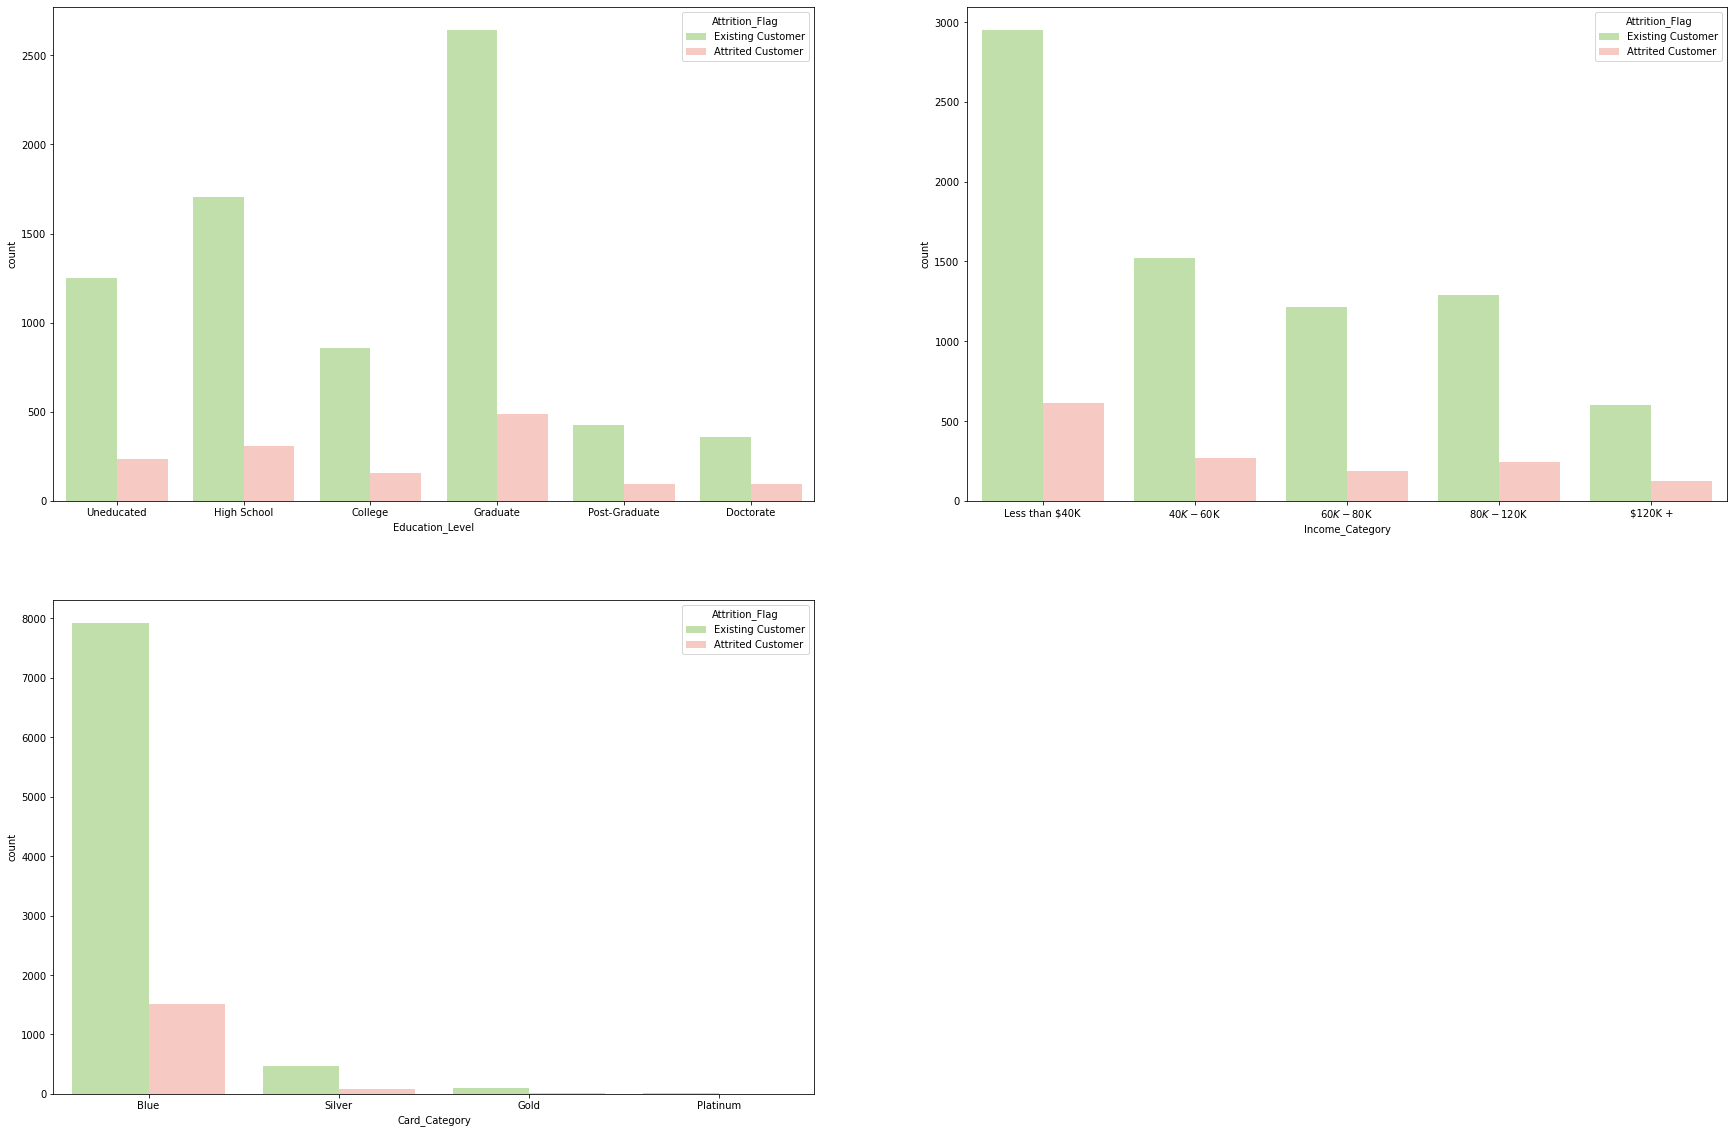

In [193]:
#@title
import seaborn as sns
import matplotlib.pyplot as plt

# Order the education level categories
edu_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']

# Order the income categories
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Order the card categories
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']

# Create a 2x2 subplot figure
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))

# Create a count plot for education level with ordered categories
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=churn_data, order=edu_order, palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'}, ax=axarr[0][0])

# Create a count plot for income category with ordered categories
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=churn_data, order=income_order, palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'}, ax=axarr[0][1])

# Create a count plot for card category with ordered categories
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=churn_data, order=card_order, palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'}, ax=axarr[1][0])
axarr[1][1].remove()
plt.show()


Attrition levels seems to be lower with customers that have higher education level, the low income Customers have a greater churn. we can notice majority of the customers that churned are those with a Blue credit card. this could be indicating the bank might be putting more emphasis on "Better Customers" and/or being selective in there card allocation


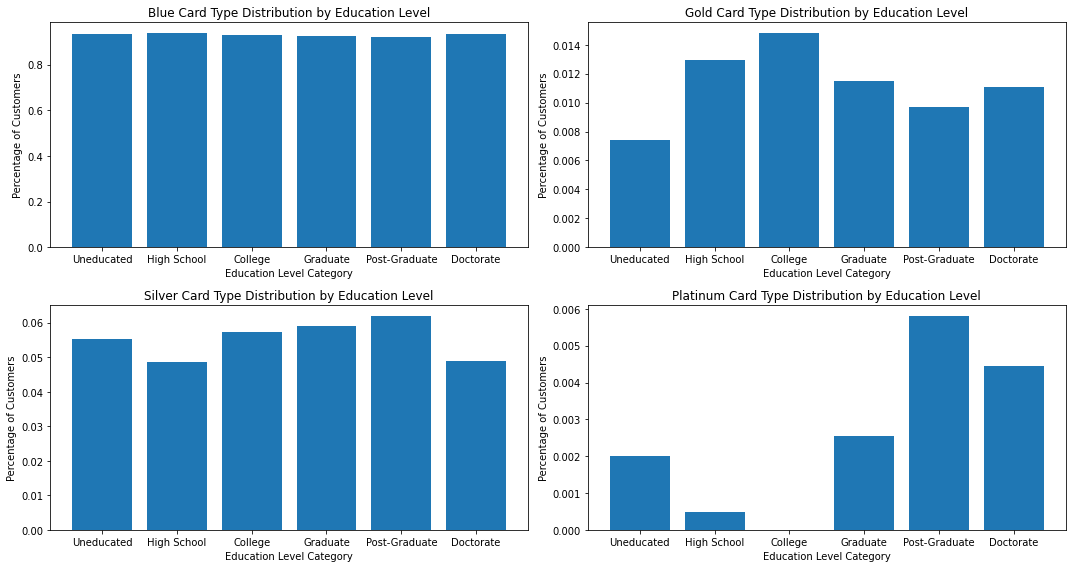

In [194]:
#@title
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation table between the 'Education_Level' and 'Card_Category' variables
table = pd.crosstab(churn_data['Education_Level'], churn_data['Card_Category'])

# Calculate the card percentages for each Education_Level category
card_percentages = table.apply(lambda x: x / x.sum(axis=0), axis=1)

# Define the desired order for the income categories
Education_Level_order = [ 'Uneducated','High School', 'College', 'Graduate',
                          'Post-Graduate','Doctorate']

# Sort the income categories according to the desired order
card_percentages = card_percentages.loc[Education_Level_order]

# Loop over each card category and plot a bar chart for that category
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
for i, card in enumerate(['Blue', 'Gold', 'Silver', 'Platinum']):
    row = i // 2
    col = i % 2
    ax[row, col].bar(card_percentages.index, card_percentages[card])
    ax[row, col].set_xlabel('Education Level Category')
    ax[row, col].set_ylabel('Percentage of Customers')
    ax[row, col].set_title(f'{card} Card Type Distribution by Education Level')
plt.tight_layout()
plt.show()


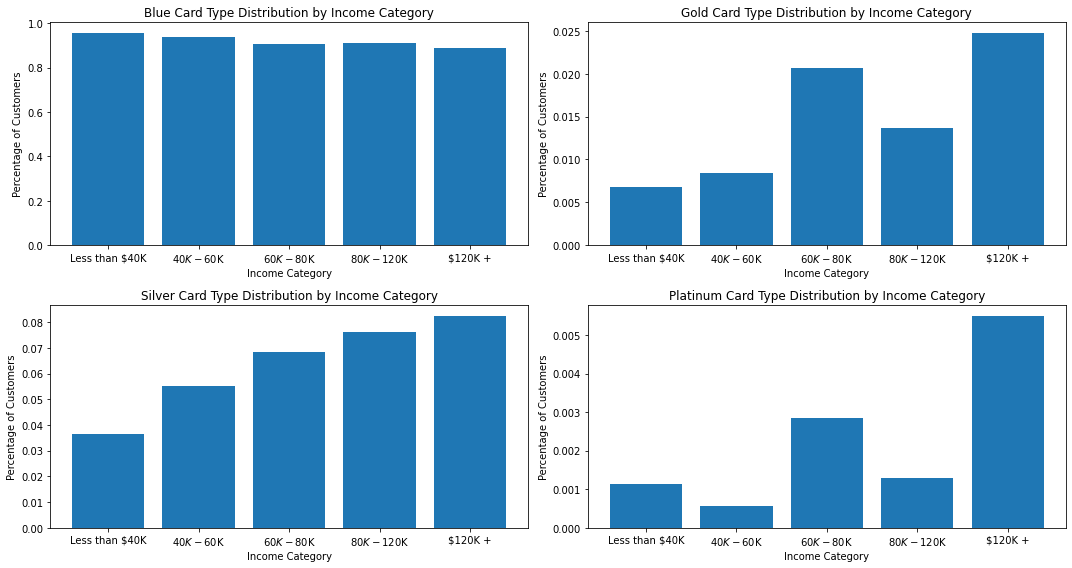

In [195]:
#@title
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation table between the 'Income_Category' and 'Card_Category' variables
table = pd.crosstab(churn_data['Income_Category'], churn_data['Card_Category'])

# Calculate the card percentages for each income category
card_percentages = table.apply(lambda x: x / x.sum(axis=0), axis=1)

# Define the desired order for the income categories
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Sort the income categories according to the desired order
card_percentages = card_percentages.loc[income_order]

# Loop over each card category and plot a bar chart for that category
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
for i, card in enumerate(['Blue', 'Gold', 'Silver', 'Platinum']):
    row = i // 2
    col = i % 2
    ax[row, col].bar(card_percentages.index, card_percentages[card])
    ax[row, col].set_xlabel('Income Category')
    ax[row, col].set_ylabel('Percentage of Customers')
    ax[row, col].set_title(f'{card} Card Type Distribution by Income Category')
plt.tight_layout()
plt.show();


The plot allows us to see the breakdown customers by attrition status over months of inactivity, and we can observe that the proportion of attrited customers increases as the number of months of inactivity increases. For instance, for customers with 4 months of inactivity, 29.9% were attrited customers compared to 4.5% in the first. 

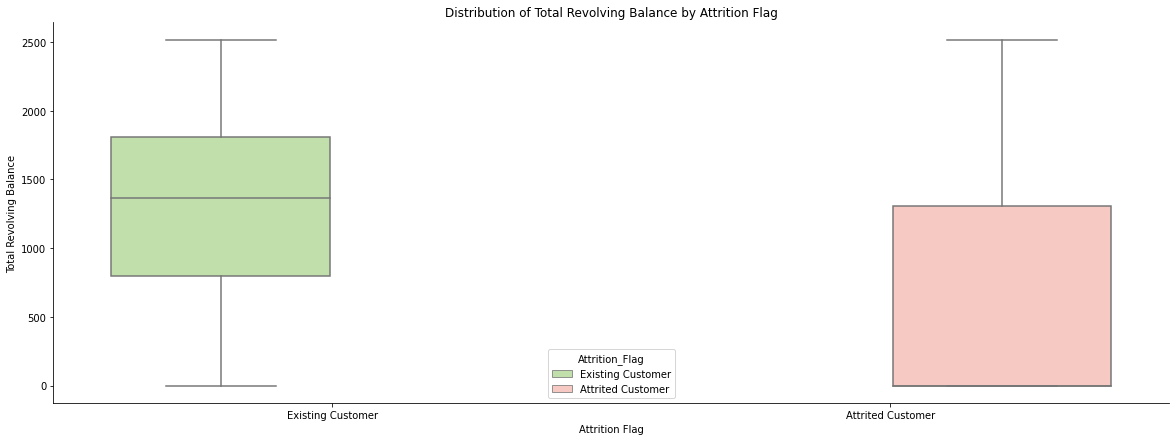

In [196]:
#@title
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[20,7])
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=churn_data, hue='Attrition_Flag', palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'})
plt.xlabel('Attrition Flag')
plt.ylabel('Total Revolving Balance')
plt.title('Distribution of Total Revolving Balance by Attrition Flag')
sns.despine()


people with small revolving balance on average are more likely churn. People who are inactive for many months during the year are more likely to churn, as well. also it seems that more contanct the company had with the customer the less likely it is for to churn

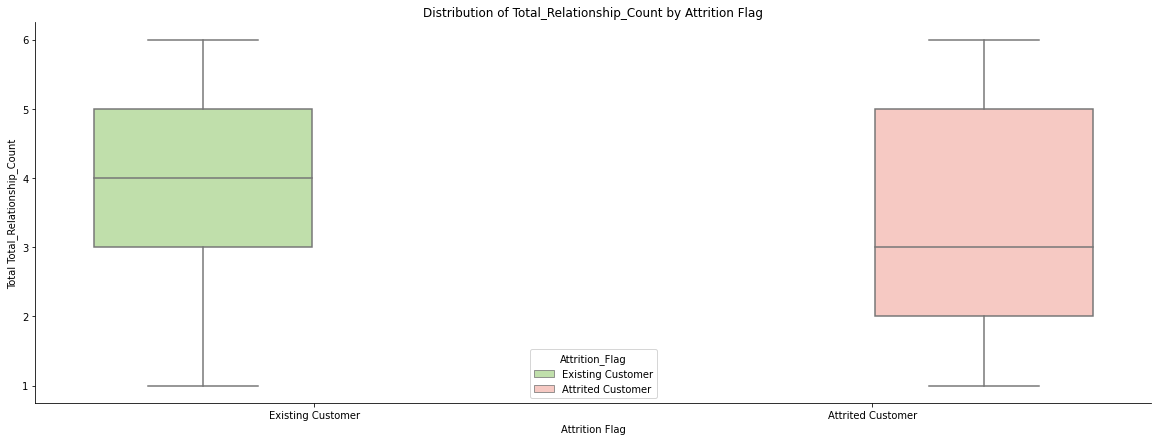

In [197]:
#@title
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[20,7])
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=churn_data, hue='Attrition_Flag', palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'})
plt.xlabel('Attrition Flag')
plt.ylabel('Total Total_Relationship_Count')
plt.title('Distribution of Total_Relationship_Count by Attrition Flag')
sns.despine()


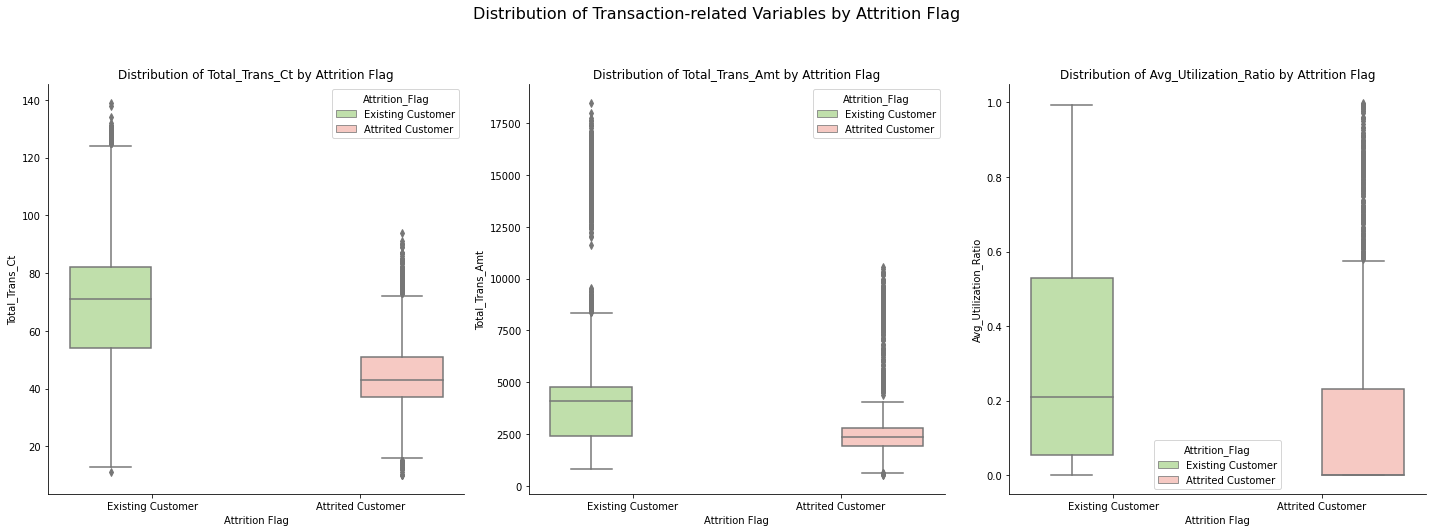

In [198]:
#@title
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[20,7])

sns.boxplot(ax=axes[0], x='Attrition_Flag', y='Total_Trans_Ct', data=churn_data, hue='Attrition_Flag', palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'})
axes[0].set_xlabel('Attrition Flag')
axes[0].set_ylabel('Total_Trans_Ct')
axes[0].set_title('Distribution of Total_Trans_Ct by Attrition Flag')
sns.despine(ax=axes[0])

sns.boxplot(ax=axes[1], x='Attrition_Flag', y='Total_Trans_Amt', data=churn_data, hue='Attrition_Flag', palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'})
axes[1].set_xlabel('Attrition Flag')
axes[1].set_ylabel('Total_Trans_Amt')
axes[1].set_title('Distribution of Total_Trans_Amt by Attrition Flag')
sns.despine(ax=axes[1])

sns.boxplot(ax=axes[2], x='Attrition_Flag', y='Avg_Utilization_Ratio', data=churn_data, hue='Attrition_Flag', palette={'Existing Customer': '#BEE7A3', 'Attrited Customer':  '#FFC3BA'})
axes[2].set_xlabel('Attrition Flag')
axes[2].set_ylabel('Avg_Utilization_Ratio')
axes[2].set_title('Distribution of Avg_Utilization_Ratio by Attrition Flag')
sns.despine(ax=axes[2])

fig.suptitle('Distribution of Transaction-related Variables by Attrition Flag', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


In [199]:
#@title
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=2, cols=1)

tr1 = go.Box(x=churn_data['Customer_Age'],name='Age Box Plot',boxmean=True)
tr2 = go.Histogram(x=churn_data['Customer_Age'], name='Age Histogram', nbinsx=30, 
                 histnorm='percent', marker_color='#008080', opacity=0.75, marker_line_width=1, marker_line_color='black')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

We can see that the distribution of customer ages in our dataset follows a fairly normal distribution; thus, further use of the age feature can be done with the normality assumption.



In [200]:
#@title
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)

tr1 = go.Box(x=churn_data['Dependent_count'], name='Dependent count Box Plot', boxmean=True)
tr2 = go.Histogram(x=churn_data['Dependent_count'], name='Dependent count Histogram', xbins=dict(size=1), histnorm='percent', marker_color='#008080', opacity=0.75, marker_line_width=1, marker_line_color='black')

fig.add_trace(tr1, row=1, col=1)
fig.add_trace(tr2, row=2, col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Dependent counts (close family size)")
fig.show()


In [201]:
#@title
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=churn_data['Months_on_book'],name='Months on book Box Plot',boxmean=True)
tr2=go.Histogram(x=churn_data['Months_on_book'],name='Months on book Histogram', xbins=dict(size=1), histnorm='percent', marker_color='#008080', opacity=0.75, marker_line_width=1, marker_line_color='black')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of months the customer is part of the bank")
fig.show()

Because the distribution is flat and not normal-shaped, it is not safe to assume that the feature being analyzed is normally distributed. If the distribution is not normal, it may affect the validity of the statistical tests and the accuracy of any conclusions drawn from the data. Therefore, it is important to identify and address any departures from normality in the data before conducting any statistical analyses.

In [202]:
#@title

fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=churn_data['Total_Relationship_Count'],name='Total no. of products Box Plot',boxmean=True)
tr2=go.Histogram(x=churn_data['Total_Relationship_Count'],name='Total no. of products Histogram',xbins=dict(size=1), histnorm='percent', marker_color='#008080', opacity=0.75, marker_line_width=1, marker_line_color='black')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Total no. of products held by the customer")
fig.show()

The distribution of the total number of products held by the customer seems closer to a uniform distribution, A uniform distribution is a type of probability distribution where all values in the distribution have an equal probability of occurring. In other words, each value in the distribution is as likely to occur as any other value.

If the distribution of the total number of products held by the customer appears closer to a uniform distribution, it means that each value of the number of products is equally likely to occur. This makes it difficult to use the number of products as a predictor for churn status because there is no clear relationship between the number of products held and the likelihood of churn.



In [203]:
#@title
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=churn_data['Months_Inactive_12_mon'],name='number of months inactive Box Plot',boxmean=True)
tr2=go.Histogram(x=churn_data['Months_Inactive_12_mon'],name='number of months inactive Histogram',xbins=dict(size=1), histnorm='percent', marker_color='#008080', opacity=0.75, marker_line_width=1, marker_line_color='black')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the number of months inactive in the last 12 months")
fig.show()


In [204]:
#@title
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=churn_data['Credit_Limit'],name='Credit_Limit Box Plot',boxmean=True)
tr2=go.Histogram(x=churn_data['Credit_Limit'],name='Credit_Limit Histogram',xbins=dict(size=500), histnorm='percent', marker_color='#008080', opacity=0.75, marker_line_width=1, marker_line_color='black')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the Credit Limit")
fig.show()

A histogram with left skew, also known as negative skew, means that the distribution is not symmetric and has a tail that extends towards the left-hand side of the histogram. In other words, the left side of the histogram is longer than the right side. This can happen when the data has a few very large values that pull the mean towards the higher end of the scale, or when the majority of the data falls towards the lower end of the scale.  a left-skewed histogram can have different effects on the data depending on the nature and context of the analysis. It is important to consider the underlying causes of the skewness and use appropriate methods and measures to describe and analyze the data

In [205]:
#@title
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=churn_data['Total_Trans_Amt'],name='Total_Trans_Amt Box Plot',boxmean=True)
tr2=go.Histogram(x=churn_data['Total_Trans_Amt'],name='Total_Trans_Amt Histogram',xbins=dict(size=250), histnorm='percent', marker_color='#008080', opacity=0.75, marker_line_width=1, marker_line_color='black')


fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the Total Transaction Amount (Last 12 months)")
fig.show()

We see that the distribution of the total transactions (Last 12 months) displays a multimodal distribution, meaning we have some underlying groups in our data; it can be an interesting experiment to try and cluster the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.

##**Exploring correlation**


### **What variables are strongly correlated with churn probability? Are there any variables that have a particularly strong positive or negative correlation with churn? Are there any variables that are strongly correlated with each other? If so, what does this suggest about their relationship to churn?**

<Axes: >

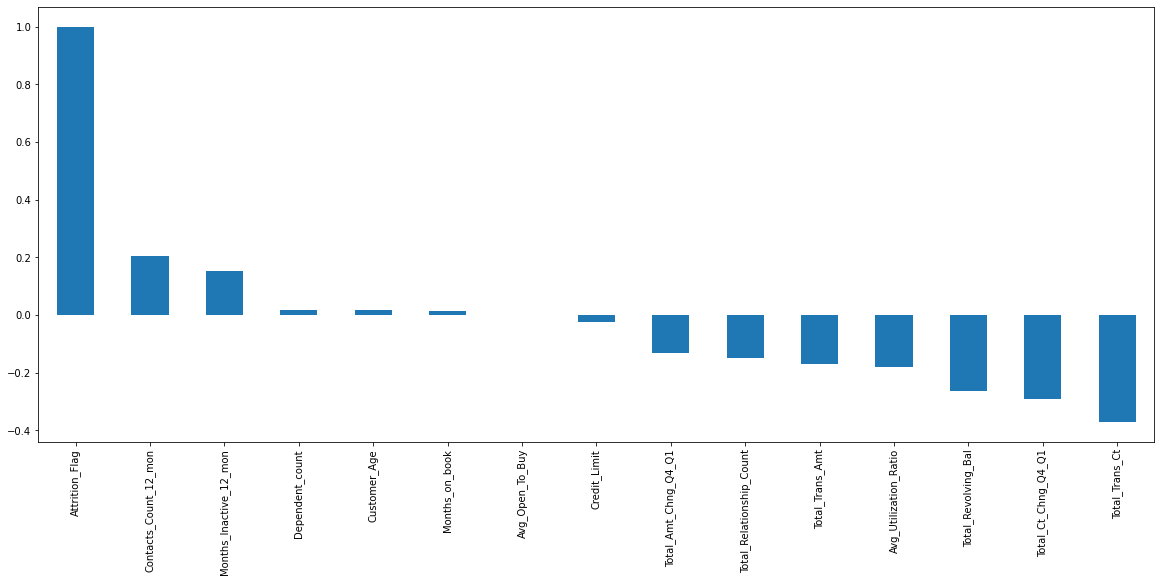

In [54]:
#@title
plt.figure(figsize=(20,8))
churn_data_copy['Attrition_Flag'] = churn_data_copy['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
churn_data_copy.corr()['Attrition_Flag'].sort_values(ascending = False).plot(kind='bar')

HIGH Churn seen in case of contacts_count_12_mon,months_inactive_12_mon.

LOW Churn is seens in case of Total_tran_ct,Total_ct_chng_Q4_Q1, Total_Revolving_Balance.
Factors like Depedent_count, Customer_Age Month_on_books and Avg_Open_To_Buy have alomost NO impact on Churn

This is also evident from the Heatmap below

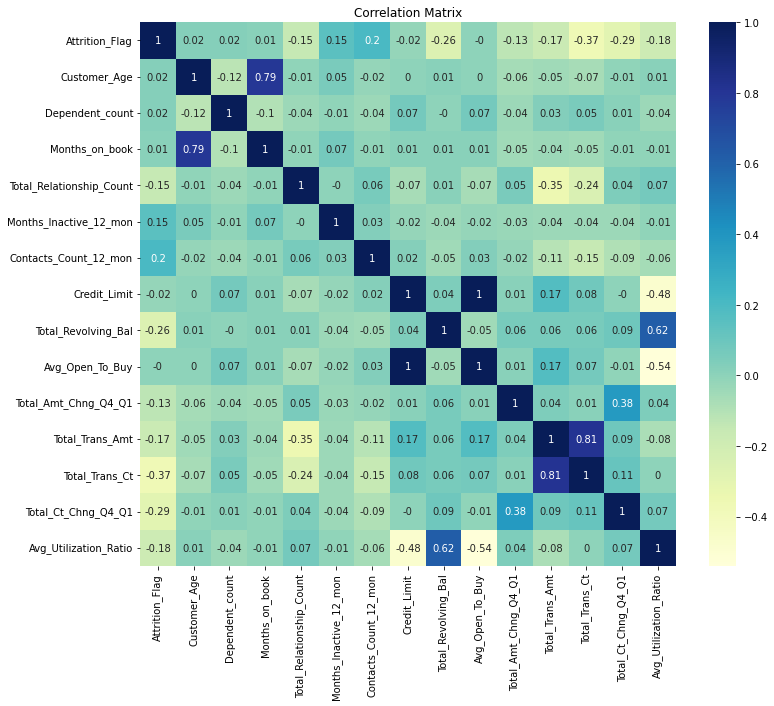

In [55]:
#@title
corr = churn_data_copy.corr(method='pearson').round(6)
plt.figure(figsize=(12,10))
sns.heatmap(churn_data_copy.corr(method='pearson').round(2), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

In the case of credit limit and average open to buy, since they are perfectly correlated, i can drop one of them without losing any information. However It may also be helpful to consider other factors or variables that could affect the relationship between these two variables and the outcome of your analysis.

In [56]:
churn_data.drop('Credit_Limit', axis=1, inplace=True)


### **a) Corralation between education, income level, and Average open-to-buy (OTB) on attrition**

There is a well-documented relationship between education, income level, and average open-to-buy (OTB) among consumers. Open-to-buy is a retail term that refers to the amount of money a consumer has available to spend on new purchases, after accounting for expenses and previous purchases.

Research shows that individuals with higher levels of education tend to have higher income levels and, therefore, higher average open-to-buy. This is because education can improve an individual's skills, knowledge, and abilities, which can translate into higher-paying jobs and career advancement opportunities.

Furthermore, research also suggests that higher levels of education are associated with better financial planning and decision-making skills, which can also contribute to higher levels of disposable income and a higher average open-to-buy.

On the other hand, individuals with lower levels of education may have lower income levels and, therefore, a lower average open-to-buy.

Text(114.0, 0.5, 'Education Level')

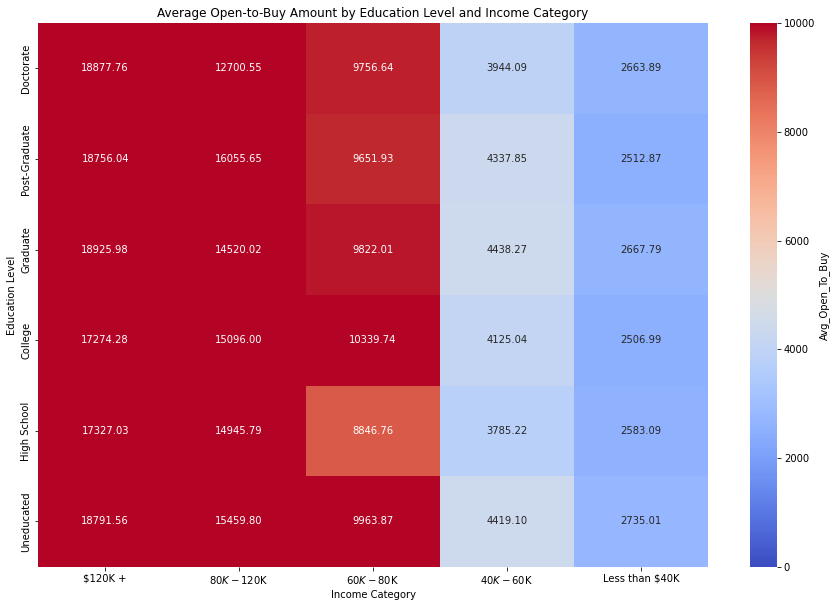

In [57]:
#@title
import pandas as pd


# Create a pivot table that shows the average income for each education level
pivot_table = pd.pivot_table(churn_data_copy, values='Avg_Open_To_Buy', index='Education_Level', columns='Income_Category', aggfunc='mean')

# Display the pivot table
#pivot_table
Education_Level = ['Doctorate', 'Post-Graduate', 'Graduate', 'College', 'High School', 'Uneducated']
income_order = ['$120K +', '$80K - $120K', '$60K - $80K', '$40K - $60K', 'Less than $40K']

pivot_table_df = pd.DataFrame(pivot_table)
pivot_table_df = pivot_table_df.reindex(columns=['$120K +', '$80K - $120K', '$60K - $80K', '$40K - $60K', 'Less than $40K'])
pivot_table_df = pivot_table_df.reindex( ['Doctorate', 'Post-Graduate', 'Graduate', 'College', 'High School', 'Uneducated'])

# Set the figure size
plt.figure(figsize=(15, 10))


# Plot the heatmap
sns.heatmap(pivot_table_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=0, vmax=10000, cbar_kws={'label': 'Avg_Open_To_Buy'}, yticklabels=Education_Level, xticklabels=income_order)

# Set the title and axis labels
plt.title('Average Open-to-Buy Amount by Education Level and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Education Level')


In [58]:
#@title
from scipy.stats import chi2_contingency
from tabulate import tabulate

# Create a contingency table
cont_table = pd.crosstab(churn_data['Education_Level'], churn_data['Income_Category'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# Print the results
table = [['Chi-Square test between Education_Level and Income_Category'],
         ["Chi-Square Statistic", f"{chi2:.2f}"],
         ["P-value", f"{p:.4f}"]]
table_str = tabulate(table, tablefmt='fancy_grid')
print(table_str)
print()
print('Contingency table:')
print(tabulate(cont_table, headers='keys', tablefmt='fancy_grid'))
print()

# Create a contingency table with average open to buy
cont_table = pd.pivot_table(churn_data, values='Avg_Open_To_Buy', index='Education_Level', columns='Income_Category', aggfunc='mean')

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# Print the results
table = [['Chi-Square test between Avg_Open_To_Buy, Education_Level and Income_Category'],
         ["Chi-Square Statistic", f"{chi2:.2f}"],
         ["P-value", f"{p:.4f}"]]
table_str = tabulate(table, tablefmt='fancy_grid')
print(table_str)
print()
print('Contingency table with Average Open to Buy:')
print(tabulate(cont_table, headers='keys', tablefmt='fancy_grid'))


╒═════════════════════════════════════════════════════════════╤═════════╕
│ Chi-Square test between Education_Level and Income_Category │         │
├─────────────────────────────────────────────────────────────┼─────────┤
│ Chi-Square Statistic                                        │ 45.25   │
├─────────────────────────────────────────────────────────────┼─────────┤
│ P-value                                                     │  0.0366 │
╘═════════════════════════════════════════════════════════════╧═════════╛

Contingency table:
╒═══════════════════╤═══════════╤═══════════════╤═══════════════╤════════════════╤══════════════════╤═══════════╕
│ Education_Level   │   $120K + │   $40K - $60K │   $60K - $80K │   $80K - $120K │   Less than $40K │   Unknown │
╞═══════════════════╪═══════════╪═══════════════╪═══════════════╪════════════════╪══════════════════╪═══════════╡
│ College           │        70 │           183 │           132 │            175 │              345 │       108 │
├─────

The table shows the average open to buy amount (in dollars) for customers in different income categories, grouped by their education level.

Looking at the table, we can see that customers with Doctorate and Graduate degrees generally have the highest average open to buy amounts, while those with Less than $40K and Unknown income categories have the lowest.

Interestingly, the College education level has the highest average open to buy amount for the $120K+ income category, while for the other income categories, it falls somewhere in the middle.

Similarly, for the $40K - $60K and $80K - $120K income categories, customers with Post-Graduate education have the highest average open to buy amount.

 The Chi-Square statistic between Education_Level and Income_Category
 is 45.25 and the p-value is 0.0365. The p-value is less than 0.05, which indicates that we can reject the null hypothesis and conclude that there is a significant relationship between education level and income category.

Chi-Square test between Avg_Open_To_Buy, Education_Level and Income_Category indicates that the chi-square statistic is 1250.8267 and the p-value is very small (4.001034144265498e-244), which suggests that the null hypothesis can be rejected at a very high level of significance.

#  **Part2  - Data preprocessing**

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

## **One-hot encodeing**

In [207]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [208]:
churn_data['Attrition_Flag'] = churn_data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
churn_data['Gender'] = churn_data['Gender'].replace({'M': 0, 'F': 1})

In [209]:
cat_cols = ['category', 'object']  # specify the data types you want to include
for col in churn_data.columns:
    if churn_data[col].dtype in cat_cols:
        print(f"{col}: {churn_data[col].unique()}")
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [210]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', missing_values='Unknown')
churn_data['Education_Level'] = imputer.fit_transform(churn_data[['Education_Level']])
churn_data['Marital_Status'] = imputer.fit_transform(churn_data[['Marital_Status']])
churn_data['Income_Category'] = imputer.fit_transform(churn_data[['Income_Category']])


In [211]:
for feature in churn_data.columns:
    if churn_data[feature].dtype not in ['int64', 'float64']:
        print(f'{feature}: {churn_data[feature].unique()}')

Education_Level: ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [212]:
churn_data = pd.get_dummies(churn_data, columns=['Education_Level','Marital_Status','Income_Category','Card_Category'])

In [213]:
for feature in churn_data.columns:
        print(f'{feature}: {churn_data[feature].unique()}')
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


Attrition_Flag: [0 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Customer_Age: [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gender: [0 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Dependent_count: [3 5 4 2 0 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Months_on_book: [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total_Relationship_Count: [5 6 4 3 2 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Months_Inactive_12_mon: [1 4 2 3 6 0 5]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Contacts_Count_12_mon: [3 2 0 1 4 5 6]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Credit_Limit: [12691.  8256.  3418. ...  5409.  5281. 10388.]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total_Revolving_Bal: [ 777  864    0 ...  53

In [214]:
cols_to_scale = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                 'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Avg_Open_To_Buy',
                 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_data[cols_to_scale] = scaler.fit_transform(churn_data[cols_to_scale])

In [215]:
cols_to_scale = ['Dependent_count','Total_Relationship_Count',
                 'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Avg_Open_To_Buy',
                 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_data[cols_to_scale] = scaler.fit_transform(churn_data[cols_to_scale])

In [216]:
for feature in cols_to_scale:
        print(f'{feature}:,{churn_data[feature].min()} ,{churn_data[feature].max()}')
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Dependent_count:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total_Relationship_Count:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Months_Inactive_12_mon:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Contacts_Count_12_mon:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total_Revolving_Bal:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Avg_Open_To_Buy:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total_Amt_Chng_Q4_Q1:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total_Trans_Amt:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total_Trans_Ct:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total_Ct_Chng_Q4_Q1:,0.0 ,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## **Data Splitting into Input Features and Target Variable**

In [217]:
# Splitting the data into training and testing sets
X = churn_data.drop("Attrition_Flag", axis=1)
y = churn_data["Attrition_Flag"]

## **Splitting Data into Training, Testing & validation Sets**

In [218]:
#@title
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Split training set into training and validation sets (60% training, 20% validation) By using the stratify parameter
#im telling the train_test_split function to preserve the class distribution in the split datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0,stratify = y_train)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:",      X_test.shape)


Training set shape: (6075, 33)
Validation set shape: (2026, 33)
Test set shape: (2026, 33)


In [219]:
#@title

# Check class distribution in original dataset
class_dist_full = np.bincount(y) / len(y)
print('Class distribution in full dataset:', class_dist_full)

# Check class distribution in training set
class_dist_train = np.bincount(y_train) / len(y_train)
print('Class distribution in training set:', class_dist_train)

# Check class distribution in validation set
class_dist_val = np.bincount(y_val) / len(y_val)
print('Class distribution in validation set:', class_dist_val)

# Check class distribution in test set
class_dist_test = np.bincount(y_test) / len(y_test)
print('Class distribution in test set:', class_dist_test)


Class distribution in full dataset: [0.83934038 0.16065962]
Class distribution in training set: [0.83934156 0.16065844]
Class distribution in validation set: [0.83909181 0.16090819]
Class distribution in test set: [0.83958539 0.16041461]


## **Handling Data imbalnce using oversample**




In [220]:
#@title
# Perform over-sampling on the training set
from imblearn.over_sampling import RandomOverSampler

# Define the over-sampler
ros = RandomOverSampler(random_state=0)

# Perform over-sampling on the training set
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Split the over-sampled data into training, validation, and testing sets
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(X_train_resampled, y_train_resampled, test_size=0.25, random_state=0, stratify=y_train_resampled)

# Print the number of samples in each set after over-sampling
print("Number of samples in the original training set: ", len(X_train))
print("Number of samples in the over-sampled training set: ", len(X_train_resampled))
print("Number of samples in the validation set: ", len(X_val_resampled))
print("Number of samples in the test set: ", len(X_test))


Number of samples in the original training set:  6075
Number of samples in the over-sampled training set:  7648
Number of samples in the validation set:  2550
Number of samples in the test set:  2026


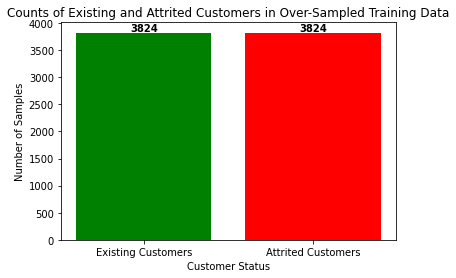

In [221]:
# Count the number of samples for each class in the y_train_resampled array
unique, counts = np.unique(y_train_resampled, return_counts=True)

# Define the labels and counts for the bar plot
labels = ['Existing Customers', 'Attrited Customers']
counts = [counts[0], counts[1]]

# Define the colors for the bars
colors = ['green', 'red']

# Create the bar plot
plt.bar(labels, counts, color=colors)

# Add text labels for the counts
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Set the title and axis labels
plt.title('Counts of Existing and Attrited Customers in Over-Sampled Training Data')
plt.xlabel('Customer Status')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()

#**Part 3 - Model selection for customer churn prediction:**

##**MLP classifier**

### **MLP classifier with oversampling**

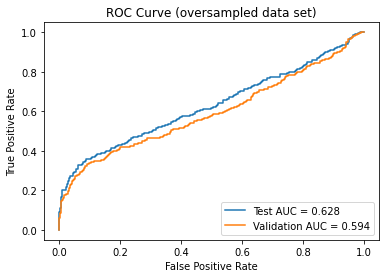

MLP Classifier classification metrics - Test set (oversampled data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AUC: 0.628
MCC: 0.272
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1701
           1       0.81      0.12      0.20       325

    accuracy                           0.85      2026
   macro avg       0.83      0.56      0.56      2026
weighted avg       0.85      0.85      0.80      2026


MLP Classifier classification metrics - Validation set (oversampled data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AUC: 0.594
MCC 0.281
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1700
           1       0.83      0.12      0.21       326

    accuracy                           0.85      2026
   macro avg       0.84      0.56      0.56      2026
weighted avg       0.85      0.85      0.81      2026



In [ ]:
#@title
# Define the over-sampler
ros = RandomOverSampler(random_state=0)

# Resample the training set
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train the MLP classifier on the resampled training set
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='adaptive', 
                    learning_rate_init=0.001, max_iter=1500, momentum=0.9, 
                    nesterovs_momentum=True, power_t=0.5, random_state=0, 
                    shuffle=True, tol=0.0001, validation_fraction=0.25, verbose=False, 
                    warm_start=False, early_stopping=False, n_iter_no_change=10, 
                    max_fun=15000)
mlp.fit(X_train_resampled, y_train_resampled)

# Predict on validation set
y_val_pred = mlp.predict(X_val)

# Get classification metrics on the oversampled validation set
mlp_confusion_matrix_valid_os = confusion_matrix(y_val, y_val_pred)
mlp_auc_valid_os = roc_auc_score(y_val, mlp.predict_proba(X_val)[:, 1])
fpr_val, tpr_val, _ = roc_curve(y_val, mlp.predict_proba(X_val)[:, 1])
mlp_precision_valid_os = precision_score(y_val, y_val_pred)
mlp_recall_valid_os = recall_score(y_val, y_val_pred)
mlp_f1_score_valid_os = f1_score(y_val, y_val_pred)
mlp_mcc_valid_os = matthews_corrcoef(y_val, y_val_pred)

# Predict on test set
y_test_pred = mlp.predict(X_test)

# Get classification metrics on oversampled test set
mlp_confusion_matrix_test_os = confusion_matrix(y_test, y_test_pred)
mlp_auc_test_os = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
mlp_precision_test_os = precision_score(y_test, y_test_pred)
mlp_recall_test_os = recall_score(y_test, y_test_pred)
mlp_f1_score_test_os = f1_score(y_test, y_test_pred)
mlp_mcc_test_os = matthews_corrcoef(y_test, y_test_pred)

# Plot the ROC curve for the test data
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {mlp_auc_test_os:.3f}')
# Plot the ROC curve for the validation data
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {mlp_auc_valid_os:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (oversampled data set)')
plt.legend(loc='lower right')
plt.show()

# Print the results for the test set
print('MLP Classifier classification metrics - Test set (oversampled data)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('AUC: {:.3f}'.format(mlp_auc_test_os))
print('MCC: {:.3f}'.format(mlp_mcc_test_os))
print(classification_report(y_test, y_test_pred))

# Print the results for the validation set
print()
print('MLP Classifier classification metrics - Validation set (oversampled data)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('AUC: {:.3f}'.format(mlp_auc_valid_os))
print('MCC {:.3f}'.format(mlp_mcc_valid_os))
print(classification_report(y_val, y_val_pred))


### **MLP classifier with imbalanced data**

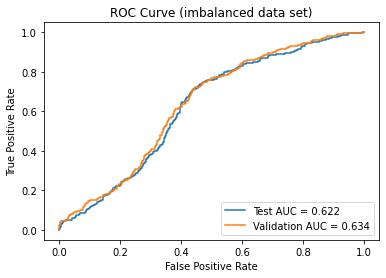


MLP Classifier classification metrics - Test set (imbalnced data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AUC: 0.622
MCC: 0.164
              precision    recall  f1-score   support

           0       0.93      0.34      0.50      1701
           1       0.20      0.87      0.33       325

    accuracy                           0.42      2026
   macro avg       0.57      0.60      0.41      2026
weighted avg       0.81      0.42      0.47      2026


MLP Classifier classification metrics - Validation set (imbalnced data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AUC: 0.634
MCC: 0.164
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1700
           1       0.83      0.12      0.21       326

    accuracy                           0.85      2026
   macro avg       0.84      0.56      0.56      2026
weighted avg       0.85      0.85      0.81      2026



In [ ]:

# create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='adaptive', 
                    learning_rate_init=0.001, max_iter=1500, momentum=0.9, 
                    nesterovs_momentum=True, power_t=0.5, random_state=0, 
                    shuffle=True, tol=0.0001, validation_fraction=0.25, verbose=False, 
                    warm_start=False, early_stopping=False, n_iter_no_change=10, 
                    max_fun=15000)

# Fit the classifier to the training data
mlp.fit(X_train, y_train)

# Get the predicted probabilities for the test data
y_pred_proba_test = mlp.predict_proba(X_test)[:, 1]

# Compute the AUC score for the test data
auc_score_test = roc_auc_score(y_test, y_pred_proba_test)

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test)

# Get the predicted labels for the test data
y_pred_test = mlp.predict(X_test)

# Compute the confusion matrix for the test data
cm_test = confusion_matrix(y_test, y_pred_test)

# Compute the accuracy, precision, recall, and F1-score for the test data
accuracy_test = mlp.score(X_test, y_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
mcc_test = matthews_corrcoef(y_test, y_pred_test)

# Get the predicted probabilities for the validation data
y_pred_proba_val = mlp.predict_proba(X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve for the validation data
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)

# Compute the AUC score for the validation data
auc_score_val = roc_auc_score(y_val, y_pred_proba_val)

# Get the predicted labels for the validation data
y_pred_val = mlp.predict(X_val)

# Compute the confusion matrix for the validation data
cm_val = confusion_matrix(y_val, y_pred_val)

# Compute the accuracy, precision, recall, and F1-score for the validation data
accuracy_val = mlp.score(X_val, y_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
mcc_val = matthews_corrcoef(y_val, y_pred_val)

# Plot the ROC curve for the test data and validation data
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_score_test:.3f}')
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {auc_score_val:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (imbalanced data set)')
plt.legend(loc='lower right')
plt.show()
print()

# Print the results for the test


# Print the results for the test set
print('MLP Classifier classification metrics - Test set (imbalnced data)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('AUC: {:.3f}'.format(auc_score_test))
print('MCC: {:.3f}'.format(mcc_test))
print(classification_report(y_test, y_pred_test))

print()
print('MLP Classifier classification metrics - Validation set (imbalnced data)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('AUC: {:.3f}'.format(auc_score_val))
print('MCC: {:.3f}'.format(mcc_val))
print(classification_report(y_val, y_val_pred))







### **Results**

##**Random forest classifier**

### **Random forest classifier with oversampling**

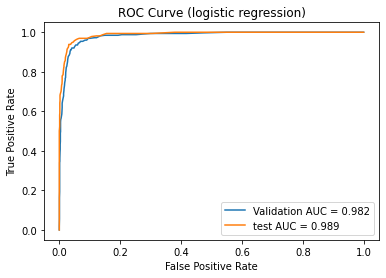


Random Forest Classifier classification metrics - Validation set (oversampled data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AUC: 0.982
MCC: 0.810
F1 Score: 0.838
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1700
           1       0.88      0.80      0.84       326

    accuracy                           0.95      2026
   macro avg       0.92      0.89      0.90      2026
weighted avg       0.95      0.95      0.95      2026

Random Forest Classifier classification metrics - Test set (oversampled data)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AUC: 0.989
MCC: 0.830
F1 Score: 0.851
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.78      0.85       325

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.91      2026

In [ ]:
#@title
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, roc_auc_score

# Define the over-sampler
ros = RandomOverSampler(random_state=0)

# Perform over-sampling on the training set
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Create an instance of the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Fit the classifier on the over-sampled training set
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the classes of the validation and test sets
y_val_pred = rf_classifier.predict(X_val)
y_test_pred = rf_classifier.predict(X_test)

# Calculate the probabilities of the classes for the validation and test sets
y_val_pred_prob = rf_classifier.predict_proba(X_val)[:, 1]
y_test_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC for the validation and test sets
rf_fpr_val, rf_tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_prob)
rf_fpr_test, rf_tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)



# Calculate the AUC, MCC, and F1 scores for the validation and test sets
rf_auc_valid_os = roc_auc_score(y_val, y_val_pred_prob)
rf_auc_test_os = roc_auc_score(y_test, y_test_pred_prob)
rf_mcc_valid_os = matthews_corrcoef(y_val, y_val_pred)
rf_mcc_test_os = matthews_corrcoef(y_test, y_test_pred)
rf_f1_valid_os = f1_score(y_val, y_val_pred)
rf_f1_test_os = f1_score(y_test, y_test_pred)

plt.plot(rf_fpr_val, rf_tpr_val, label=f'Validation AUC = {rf_auc_valid_os:.3f}')
plt.plot(rf_fpr_test, rf_tpr_test, label=f'test AUC = {rf_auc_test_os:.3f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (logistic regression)')
plt.legend(loc='lower right')
plt.show()
print()


# Print the results for the validation set
print('Random Forest Classifier classification metrics - Validation set (oversampled data)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('AUC: {:.3f}'.format(rf_auc_valid_os))
print('MCC: {:.3f}'.format(rf_mcc_valid_os))
print('F1 Score: {:.3f}'.format(rf_f1_valid_os))
print(classification_report(y_val, y_val_pred))

# Print the results for the test set
print('Random Forest Classifier classification metrics - Test set (oversampled data)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('AUC: {:.3f}'.format(rf_auc_test_os))
print('MCC: {:.3f}'.format(rf_mcc_test_os))
print('F1 Score: {:.3f}'.format(rf_f1_test_os))
print(classification_report(y_test, y_test_pred))


### **Random forest classifier with imbalanced data**

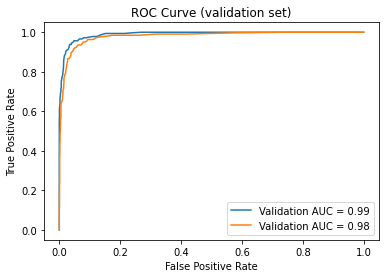

Random Forest Classifier classification metrics imbalanced set - Test set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AUC: 0.990
MCC: 0.803
F1 Score: 0.820
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.96      0.71      0.82       325

    accuracy                           0.95      2026
   macro avg       0.96      0.85      0.90      2026
weighted avg       0.95      0.95      0.95      2026


Random Forest Classifier classification metrics imbalanced set - Validation set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AUC: 0.980
MCC: 0.786
F1 Score: 0.812
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1700
           1       0.91      0.74      0.81       326

    accuracy                           0.95      2026
   macro avg       0.93      0.86      0.89      2026
weighted a

In [ ]:
#@title
# Create a Random Forest classifier
RF_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Fit the classifier on the training set
RF_classifier.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = RF_classifier.predict(X_test)


# Make predictions on the testing set
y_score = RF_classifier.predict_proba(X_test)[:, 1]
y_score_val = RF_classifier.predict_proba(X_val)[:, 1]

# Calculate the confusion matrix
RF_cm_test = confusion_matrix(y_test, y_pred)

# Calculate the AUC
auc_test = roc_auc_score(y_test, y_score)
auc_val = roc_auc_score(y_val, y_score_val)

# Calculate the ROC curve
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_score)
fpr_val, tpr_val,  thresholds = roc_curve(y_val, y_score_val)

# Plot the ROC curve
plt.plot(fpr_test, tpr_test, label=f'Validation AUC = {auc_test:.2f}')
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {auc_val:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (validation set)')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model performance on the test set
print('Random Forest Classifier classification metrics imbalanced set - Test set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('AUC: {:.3f}'.format(auc_test))
print('MCC: {:.3f}'.format(matthews_corrcoef(y_test, y_pred)))
print('F1 Score: {:.3f}'.format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Make predictions on the validation set
y_pred_val = RF_classifier.predict(X_val)

# Make predictions on the validation set
y_score_val = RF_classifier.predict_proba(X_val)[:, 1]

# Calculate the confusion matrix
RF_val_cm = confusion_matrix(y_val, y_pred_val)

# Calculate the AUC
auc_val = roc_auc_score(y_val, y_score_val)

# Evaluate the model performance on the validation set
print('\nRandom Forest Classifier classification metrics imbalanced set - Validation set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('AUC: {:.3f}'.format(auc_val))
print('MCC: {:.3f}'.format(matthews_corrcoef(y_val, y_pred_val)))
print('F1 Score: {:.3f}'.format(f1_score(y_val, y_pred_val)))
print(classification_report(y_val, y_pred_val))


### **Results**

## **Gradient Boosting**

### **Gradient Boosting with oversampled data**

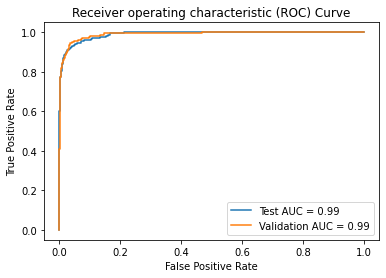

GradientBoostingClassifier - oversampled Test Set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The AUC is: 0.989
MCC: 0.846
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1701
           1       0.83      0.92      0.87       325

    accuracy                           0.96      2026
   macro avg       0.91      0.94      0.92      2026
weighted avg       0.96      0.96      0.96      2026

GradientBoostingClassifier - oversampled Validation Set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The AUC is: 0.990
MCC: 0.842
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1700
           1       0.79      0.95      0.87       326

    accuracy                           0.95      2026
   macro avg       0.89      0.95      0.92      2026
weighted avg       0.96      0.95      0.95      2026



In [ ]:
#@title
# Initialize the classifier
GB_classifier = GradientBoostingClassifier(random_state=0)

# Fit the classifier to the resampled training data
GB_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the class labels for the test set
y_pred_test = GB_classifier.predict(X_test)

# Calculate the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Make predictions on the testing set
y_score_test = GB_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC for the test set
auc_test = roc_auc_score(y_test, y_score_test)

# Calculate the ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_score_test)

# Predict the class labels for the validation set
y_pred_val = GB_classifier.predict(X_val)

# Calculate the confusion matrix for the validation set
cm_val = confusion_matrix(y_val, y_pred_val)

# Make predictions on the validation set
y_score_val = GB_classifier.predict_proba(X_val)[:, 1]

# Calculate the AUC for the validation set
auc_val = roc_auc_score(y_val, y_score_val)

# Calculate the ROC curve for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_score_val)

# Plot the ROC curve for both sets on the same plot
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.plot(fpr_val, tpr_val, label='Validation AUC = {:.2f}'.format(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend()
plt.show()

# Evaluate the model performance on the test set
print('GradientBoostingClassifier - oversampled Test Set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("The AUC is: {:.3f}".format(auc_test))
mcc_test = matthews_corrcoef(y_test, y_pred_test)
print("MCC: {:.3f}".format(mcc_test))
print(classification_report(y_test, y_pred_test))

# Evaluate the model performance on the validation set
print('GradientBoostingClassifier - oversampled Validation Set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("The AUC is: {:.3f}".format(auc_val))
mcc_test = matthews_corrcoef(y_val, y_pred_val)
print("MCC: {:.3f}".format(mcc_test))
print(classification_report(y_val, y_pred_val))


### **Gradient Boosting with imabalanced data**

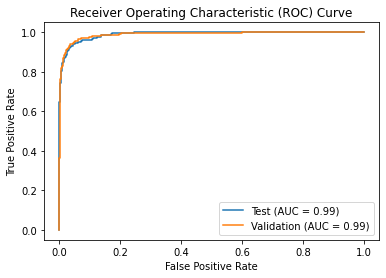

GradientBoostingClassifier - Imbalanced Test Set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The AUC is: 0.989
MCC: 0.854
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.95      0.81      0.87       325

    accuracy                           0.96      2026
   macro avg       0.96      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

GradientBoostingClassifier - Imbalanced Validation Set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The AUC is: 0.989
MCC: 0.872
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1700
           1       0.93      0.85      0.89       326

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [ ]:
#@title
# Initialize the classifier
GB_classifier = GradientBoostingClassifier(random_state=0)

# Fit the classifier to the training data
GB_classifier.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred_test = GB_classifier.predict(X_test)

# Calculate the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Make predictions on the test set
y_score_test = GB_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC for the test set
auc_test = roc_auc_score(y_test, y_score_test)

# Calculate the ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_score_test)

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test (AUC = {:.2f})'.format(auc_test))

# Make predictions on the validation set
y_pred_val = GB_classifier.predict(X_val)

# Calculate the confusion matrix for the validation set
cm_val = confusion_matrix(y_val, y_pred_val)

# Make predictions on the validation set
y_score_val = GB_classifier.predict_proba(X_val)[:, 1]

# Calculate the AUC for the validation set
auc_val = roc_auc_score(y_val, y_score_val)

# Calculate the ROC curve for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_score_val)

# Plot the ROC curve for the validation set
plt.plot(fpr_val, tpr_val, label='Validation (AUC = {:.2f})'.format(auc_val))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Evaluate the model performance on the test set
print('GradientBoostingClassifier - Imbalanced Test Set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("The AUC is: {:.3f}".format(auc_test))
mcc_test = matthews_corrcoef(y_test, y_pred_test)
print("MCC: {:.3f}".format(mcc_test))
print(classification_report(y_test, y_pred_test))

# Evaluate the model performance on the validation set
print('GradientBoostingClassifier - Imbalanced Validation Set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("The AUC is: {:.3f}".format(auc_val))
mcc_val = matthews_corrcoef(y_val, y_pred_val)
print("MCC: {:.3f}".format(mcc_val))
print(classification_report(y_val, y_pred_val))


### **Results**

## **XGBClassifier**

###**XGBClassifier with oversample set**

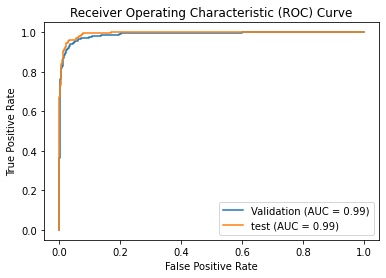

XGB - oversampled -  Test Set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The AUC is: 0.994
MCC: 0.895
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.94      0.88      0.91       325

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026

XGB - oversampled - Validation Set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The AUC is: 0.990
MCC: 0.872
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1700
           1       0.93      0.85      0.89       326

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [ ]:
#@title
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, matthews_corrcoef

# Train the XGBoost classifier on the resampled training data
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation and test sets
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Calculate classification metrics on the validation set
classification_report(y_val, y_val_pred)
cm_val = confusion_matrix(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)

# Calculate classification metrics on the test set
classification_report(y_test, y_test_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

# Plot ROC curve for validation and test sets
val_fpr, val_tpr, _ = roc_curve(y_val, xgb_model.predict_proba(X_val)[:,1])
test_fpr, test_tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
auc_val=    roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:,1])
auc_test =  roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])

# Plot the ROC curve for the validation set
plt.plot(fpr_val, tpr_val, label='Validation (AUC = {:.2f})'.format(auc_val))
plt.plot(test_fpr, test_tpr,  label='test (AUC = {:.2f})'.format(auc_test))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Evaluate the model performance on the test set
print('XGB - oversampled -  Test Set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("The AUC is: {:.3f}".format(auc_test))
print("MCC: {:.3f}".format(mcc_test))
print(classification_report(y_test, y_test_pred))


# Evaluate the model performance on the validation set
print('XGB - oversampled - Validation Set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("The AUC is: {:.3f}".format(auc_val))
mcc_val = matthews_corrcoef(y_val, y_pred_val)
print("MCC: {:.3f}".format(mcc_val))
print(classification_report(y_val, y_pred_val))


###**XGBClassifier with imbalnced set**

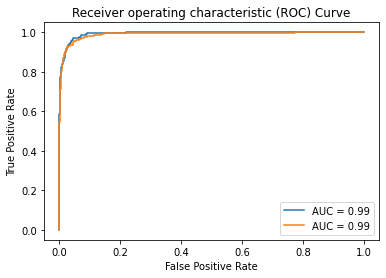


XGBClassifier - Imbalanced Test Set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The AUC is: 0.994
MCC: 0.868
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.83      0.88       325

    accuracy                           0.97      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.97      0.97      0.96      2026


XGBClassifier - Imbalanced validation Test Set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The AUC is: 0.989
MCC: 0.877
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1700
           1       0.92      0.87      0.90       326

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [ ]:
#@title
import xgboost as xgb
from sklearn.metrics import (confusion_matrix, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve)
import matplotlib.pyplot as plt

# Train an XGBClassifier
xgb_clf = xgb.XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)
y_score = xgb_clf.predict_proba(X_test)[:, 1]

# Compute the evaluation metrics
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_score)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)

# Make predictions on the validation set
y_pred_val = xgb_clf.predict(X_val)
y_score_val = xgb_clf.predict_proba(X_val)[:, 1]

# Compute the evaluation metrics on the validation set
cm_val = confusion_matrix(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_score_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
mcc_val = matthews_corrcoef(y_val, y_pred_val)
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
fpr_val, tpr_val, _ = roc_curve(y_val, y_score_val)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot(fpr_val, tpr_val, label='AUC = {:.2f}'.format(auc_val))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend()
plt.show()
print()

print('XGBClassifier - Imbalanced Test Set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("The AUC is: {:.3f}".format(auc_test))
print("MCC: {:.3f}".format(mcc_test))
print(classification_report(y_test, y_pred))
print()
print('XGBClassifier - Imbalanced validation Test Set')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("The AUC is: {:.3f}".format(auc_val))
print("MCC: {:.3f}".format(mcc_val))
print(classification_report(y_val, y_pred_val))

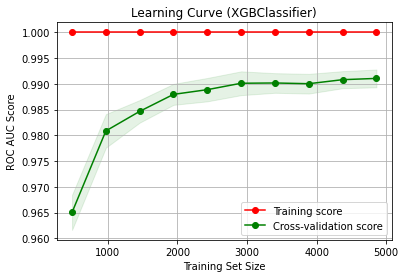

In [ ]:
#@title
from sklearn.model_selection import learning_curve

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(xgb_clf, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='roc_auc')

# Compute the mean and standard deviation of the train scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve (XGBClassifier)')
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


### **Results**

## **ANN using keras**

In [ ]:
!pip install tensorflow
!pip install keras

###**ANN with over sampled set**

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow import keras
from tensorflow.keras import metrics

np.random.seed(0)

# Define the ANN model
ANN_model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ANN_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=[metrics.BinaryAccuracy(name='accuracy'),
                           metrics.Precision(name='precision'),
                           metrics.Recall(name='recall'),
                           metrics.AUC(name='auc')])

# Train the model using the resampled training set and validation set
history = ANN_model.fit(X_train_resampled, y_train_resampled,
                        validation_data=(X_val, y_val),
                        epochs=100, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc, test_precision, test_recall, test_auc = ANN_model.evaluate(X_test, y_test)
test_preds = ANN_model.predict(X_test)
test_preds_binary = np.round(test_preds)
test_mcc = matthews_corrcoef(y_test, test_preds_binary)
test_roc_auc = roc_auc_score(y_test, test_preds)

# Evaluate the model on the validation set
val_preds = ANN_model.predict(X_val)
val_preds_binary = np.round(val_preds)
val_mcc = matthews_corrcoef(y_val, val_preds_binary)
val_roc_auc = roc_auc_score(y_val, val_preds)


# Generate classification report for validation set
print
print(f"Validation AUC: {val_roc_auc:.2f}")
print(f"Validation MCC: {val_mcc:.2f}")
print('Classification report for validation set os:\n', classification_report(y_val, val_preds_binary))
print()
# Generate classification report for test set
print(f"Test AUC: {test_roc_auc:.2f}")
print(f"Test MCC: {test_mcc:.2f}")
print('Classification report for test set os:\n', classification_report(y_test, test_preds_binary))


Epoch 1/100
319/319 [==============================] - 4s 7ms/step - loss: 0.5423 - accuracy: 0.7362 - precision: 0.7664 - recall: 0.6795 - auc: 0.8130 - val_loss: 0.4380 - val_accuracy: 0.8021 - val_precision: 0.4314 - val_recall: 0.7239 - val_auc: 0.8548
Epoch 2/100
319/319 [==============================] - 3s 10ms/step - loss: 0.4001 - accuracy: 0.8204 - precision: 0.8226 - recall: 0.8168 - auc: 0.9012 - val_loss: 0.3423 - val_accuracy: 0.8603 - val_precision: 0.5492 - val_recall: 0.7362 - val_auc: 0.8877
Epoch 3/100
319/319 [==============================] - 3s 9ms/step - loss: 0.3549 - accuracy: 0.8447 - precision: 0.8445 - recall: 0.8449 - auc: 0.9232 - val_loss: 0.4011 - val_accuracy: 0.8223 - val_precision: 0.4713 - val_recall: 0.8558 - val_auc: 0.9092
Epoch 4/100
319/319 [==============================] - 2s 7ms/step - loss: 0.3270 - accuracy: 0.8615 - precision: 0.8587 - recall: 0.8655 - auc: 0.9354 - val_loss: 0.3229 - val_accuracy: 0.8623 - val_precision: 0.5505 - val_reca

### **ANN with imbalanced set**

In [ ]:
np.random.seed(0)

ANN_model = keras.Sequential([keras.layers.Dense(32,input_shape = (32,),activation = 'relu'),                              
                              keras.layers.Dense(25,activation = 'relu'),                              
                              keras.layers.Dense(1,activation = 'sigmoid')])

ANN_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[metrics.BinaryAccuracy(name='accuracy'),                      
                       metrics.Precision(name='precision'),                      
                       metrics.Recall(name='recall'),                       
                       metrics.AUC(name='auc')])                       

f1s = []
best_recall = 0
best_metrics = None
for epoch in range(100):
    ANN_model.fit(X_train, y_train, epochs=1, verbose=0)
    y_pred = ANN_model.predict(X_val)
    f1 = f1_score(y_val, np.round(y_pred))
    f1s.append(f1)
    metrics_result = ANN_model.evaluate(X_val, y_val, verbose=0)
    metrics_dict = {
        'accuracy': metrics_result[1],
        'precision': metrics_result[2],
        'recall': metrics_result[3],
        'auc': metrics_result[4],
        'f1': f1
    }
    if metrics_dict['recall'] > best_recall:
        best_recall = metrics_dict['recall']
        best_metrics = metrics_dict

    print(f"Epoch {epoch+1}: {metrics_dict}")

y_pred = ANN_model.predict(X_test)
# fpr, tpr, _ = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

from sklearn.metrics import classification_report

# Generate classification report for validation set
y_pred_val = ANN_model.predict(X_val)
y_pred_val_binary = np.round(y_pred_val)
val_auc = roc_auc_score(y_val, y_pred_val)
val_mcc = matthews_corrcoef(y_val, y_pred_val_binary)
print(f"Validation set AUC: {val_auc:.2f}")
print(f"Validation set MCC: {val_mcc:.2f}")
print('Classification report for validation set:\n', classification_report(y_val, y_pred_val_binary))
print()

# Generate classification report for test set
y_pred = ANN_model.predict(X_test)
y_pred_test_binary = np.round(y_pred)
test_auc = roc_auc_score(y_test, y_pred)
test_mcc = matthews_corrcoef(y_test, y_pred_test_binary)
print()
print(f"Test set AUC: {test_auc:.2f}")
print(f"Test set MCC: {test_mcc:.2f}")
print('Classification report for test set:\n', classification_report(y_test, y_pred_test_binary))



64/64 [==============================] - 0s 1ms/step
Epoch 1: {'accuracy': 0.8395853638648987, 'precision': 1.0, 'recall': 0.0030674845911562443, 'auc': 0.7955566644668579, 'f1': 0.0061162079510703364}
64/64 [==============================] - 0s 1ms/step
Epoch 2: {'accuracy': 0.8790720701217651, 'precision': 0.8091602921485901, 'recall': 0.3251533806324005, 'auc': 0.8570832014083862, 'f1': 0.4638949671772428}
64/64 [==============================] - 0s 3ms/step
Epoch 3: {'accuracy': 0.8899309039115906, 'precision': 0.7085019946098328, 'recall': 0.5368098020553589, 'auc': 0.8782668113708496, 'f1': 0.6108202443280977}
64/64 [==============================] - 1s 9ms/step
Epoch 4: {'accuracy': 0.8909180760383606, 'precision': 0.7868852615356445, 'recall': 0.44171780347824097, 'auc': 0.8945236206054688, 'f1': 0.5658153241650294}
64/64 [==============================] - 1s 8ms/step
Epoch 5: {'accuracy': 0.8958538770675659, 'precision': 0.7555555701255798, 'recall': 0.5214723944664001, 'auc':

# **Results**

AUC (Area Under the Curve) - AUC is a measure of the performance of a binary classification model. It measures the area under the Receiver Operating Characteristic (ROC) curve, which shows the tradeoff between the true positive rate (sensitivity) and the false positive rate (1-specificity). The AUC score ranges from 0 to 1, with a higher score indicating better performance.

Precision - Precision is a measure of how well a binary classification model correctly predicts positive samples. It is the ratio of true positives to the sum of true positives and false positives. Precision ranges from 0 to 1, with a higher score indicating fewer false positives.

Recall - Recall is a measure of how well a binary classification model correctly identifies positive samples. It is the ratio of true positives to the sum of true positives and false negatives. Recall ranges from 0 to 1, with a higher score indicating fewer false negatives.

F1-Score - F1-Score is the harmonic mean of precision and recall, and provides a balance between these two metrics. It ranges from 0 to 1, with a higher score indicating better overall performance.

MCC (Matthews Correlation Coefficient) - MCC is a correlation coefficient between the actual and predicted binary classifications. It ranges from -1 to 1, with a higher score indicating better performance. MCC takes into account true and false positives and negatives and is generally regarded as a balanced metric even when the classes are imbalanced.

## **Comparison of Classifier Performances Based on validation AND test result across data sets results**

In [ ]:
#@title
# Create a dictionary to hold the data
test_set_oversampled = {
    'Classifier':['MLPClassifier', 'Random Forest Classifier', 'Gradient Boosting Classifier','XGB Classifier',  'ANN'],
    'AUC':       [0.96,             0.99,                       0.99,                          0.993,             0.95],
    'Precision': [0.70,             0.93,                       0.83,                          0.930,             0.71],
    'Recall':    [0.81,             0.80,                       0.92,                          0.900,             0.79],
    'F1-Score':  [0.75,             0.86,                       0.87,                          0.910,             0.75],
    'MCC':       [0.70,             0.84,                       0.846,                         0.894,             0.70]
}

validation_set_oversampled = {
    'Classifier':[ 'MLPClassifier', 'Random Forest Classifier', 'Gradient Boosting Classifier','XGB Classifier', 'ANN'],
    'AUC':       [0.95,             0.98,                      0.99,                          0.990,              0.94],
    'Precision': [0.66,             0.88,                      0.80,                          0.930,              0.67],
    'Recall':    [0.85,             0.81,                      0.95,                          0.860,              0.79],
    'F1-Score':  [0.74,             0.85,                      0.87,                          0.890,              0.73],
    'MCC':       [0.69,             0.82,                      0.846,                         0.876,              0.67]                   
}

test_set_imbalanced = {
    'Classifier':['MLPClassifier', 'Random Forest Classifier', 'Gradient Boosting Classifier','XGB Classifier',  'ANN'],
    'AUC':       [0.96,             0.99,                      0.99,                          0.993,              0.96],
    'Precision': [0.85,             0.96,                      0.96,                          0.930,              0.88],
    'Recall':    [0.73,             0.71,                      0.81,                          0.860,              0.67],
    'F1-Score':  [0.79,             0.81,                      0.88,                          0.890,              0.76],
    'MCC':       [0.75,             0.80,                      0.86,                          0.876,              0.73]
}


validation_set_imbalanced = {
    'Classifier': ['MLPClassifier', 'Random Forest Classifier', 'Gradient Boosting Classifier','XGB Classifier','ANN'],
    'AUC':        [0.96,             0.98,                      0.99,                          0.991,            0.95],
    'Precision':  [0.66,             0.92,                      0.93,                          0.940,            0.79],
    'Recall':     [0.85,             0.76,                      0.86,                          0.880,            0.68],
    'F1-Score':   [0.74,             0.83,                      0.89,                          0.918,            0.73],
    'MCC':        [0.73,             0.81,                      0.876,                         0.892,            0.69]
}

# Create a pandas DataFrame from the dictionary
df_test_set_oversampled = pd.DataFrame(test_set_oversampled)
df_validation_set_oversampled = pd.DataFrame(validation_set_oversampled)
df_test_set_imbalanced = pd.DataFrame(test_set_imbalanced)
df_validation_set_imbalanced = pd.DataFrame(validation_set_imbalanced)

# Set the Classifier column as the index
df_test_set_oversampled.set_index('Classifier', inplace=True)
df_validation_set_oversampled.set_index('Classifier', inplace=True)

df_test_set_imbalanced.set_index('Classifier', inplace=True)
df_validation_set_imbalanced.set_index('Classifier', inplace=True)


# Set the formatting for the columns with floating point numbers
df_test_set_oversampled = df_test_set_oversampled.sort_values(['AUC','Precision','Recall'], ascending=[False, False,False])
df_validation_set_oversampled = df_validation_set_oversampled.sort_values(['AUC','Precision','Recall'], ascending=[False, False,False])
df_test_set_imbalanced = df_test_set_imbalanced.sort_values(['AUC','Precision','Recall'], ascending=[False, False,False])
df_validation_set_imbalanced = df_validation_set_imbalanced.sort_values(['AUC','Precision','Recall'], ascending=[False, False,False])




# define a dictionary to format the floating-point columns
format_dict = {'AUC': '{:.2f}', 'Precision': '{:.2f}', 'Recall': '{:.2f}', 'F1-Score': '{:.2f}','MCC': '{:.2f}'}

# apply the formatting and create a stylized version of the DataFrame
df_test_set_oversampled = df_test_set_oversampled.style.format(format_dict)
df_validation_set_oversampled = df_validation_set_oversampled.style.format(format_dict)

df_test_set_imbalanced = df_test_set_imbalanced.style.format(format_dict)
df_validation_set_imbalanced = df_validation_set_imbalanced.style.format(format_dict)


# Convert the styler object to a pandas DataFrame
df_test_set_oversampled = df_test_set_oversampled.data
df_test_set_oversampled = df_test_set_oversampled.rename_axis('test_set_oversampled', axis=1)

df_validation_set_oversampled = df_validation_set_oversampled.data
df_validation_set_oversampled = df_validation_set_oversampled.rename_axis('validation_set_oversampled', axis=1)

df_test_set_imbalanced = df_test_set_imbalanced.data
df_test_set_imbalanced = df_test_set_imbalanced.rename_axis('test_set_imbalanced', axis=1)

df_validation_set_imbalanced = df_validation_set_imbalanced.data
df_validation_set_imbalanced = df_validation_set_imbalanced.rename_axis('validation_set_imbalanced', axis=1)

# Display the DataFrame as a Markdown table
display(df_test_set_oversampled)
print()
display(df_validation_set_oversampled)
print()
display(df_test_set_imbalanced)
print()
display(df_validation_set_imbalanced)


# # Create a horizontal bar chart
# df.plot(kind='barh', figsize=(10,8))

# # Add labels and title
# plt.title('Model Comparison')
# plt.xlabel('Score')
# plt.ylabel('Classifier')

# plt.show()


test_set_oversampled,AUC,Precision,Recall,F1-Score,MCC
Classifier,,,,,
XGB Classifier,0.993,0.93,0.90,0.91,0.894
Random Forest Classifier,0.990,0.93,0.80,0.86,0.840
Gradient Boosting Classifier,0.990,0.83,0.92,0.87,0.846
MLPClassifier,0.960,0.70,0.81,0.75,0.700
ANN,0.950,0.71,0.79,0.75,0.700


validation_set_oversampled,AUC,Precision,Recall,F1-Score,MCC
Classifier,,,,,
XGB Classifier,0.99,0.93,0.86,0.89,0.876
Gradient Boosting Classifier,0.99,0.80,0.95,0.87,0.846
Random Forest Classifier,0.98,0.88,0.81,0.85,0.820
MLPClassifier,0.95,0.66,0.85,0.74,0.690
ANN,0.94,0.67,0.79,0.73,0.670


test_set_imbalanced,AUC,Precision,Recall,F1-Score,MCC
Classifier,,,,,
XGB Classifier,0.993,0.93,0.86,0.89,0.876
Gradient Boosting Classifier,0.990,0.96,0.81,0.88,0.860
Random Forest Classifier,0.990,0.96,0.71,0.81,0.800
ANN,0.960,0.88,0.67,0.76,0.730
MLPClassifier,0.960,0.85,0.73,0.79,0.750


validation_set_imbalanced,AUC,Precision,Recall,F1-Score,MCC
Classifier,,,,,
XGB Classifier,0.991,0.94,0.88,0.918,0.892
Gradient Boosting Classifier,0.990,0.93,0.86,0.890,0.876
Random Forest Classifier,0.980,0.92,0.76,0.830,0.810
MLPClassifier,0.960,0.66,0.85,0.740,0.730
ANN,0.950,0.79,0.68,0.730,0.690


## **Comparison results summery**

Based on the results, the XGB Classifier has the highest AUC, accuracy, precision, recall, and F1-score. Therefore, it appears to be the best model for the given classification problem. The Random Forest Classifier and Gradient Boosting Classifier also performed well, but the XGB Classifier outperformed them in all metrics.

The MLP Classifier and ANN had a high AUC, but its precision and recall were lower than the other models.

## **permutation_importance**

Permutation importance is a method used to identify the most important features in a machine learning model. It works by randomly shuffling the values of a single feature in the test set and then measuring the resulting decrease in the model's performance metric, such as accuracy or AUC. The idea behind this is that if a feature is important, then shuffling its values would significantly decrease the model's performance.

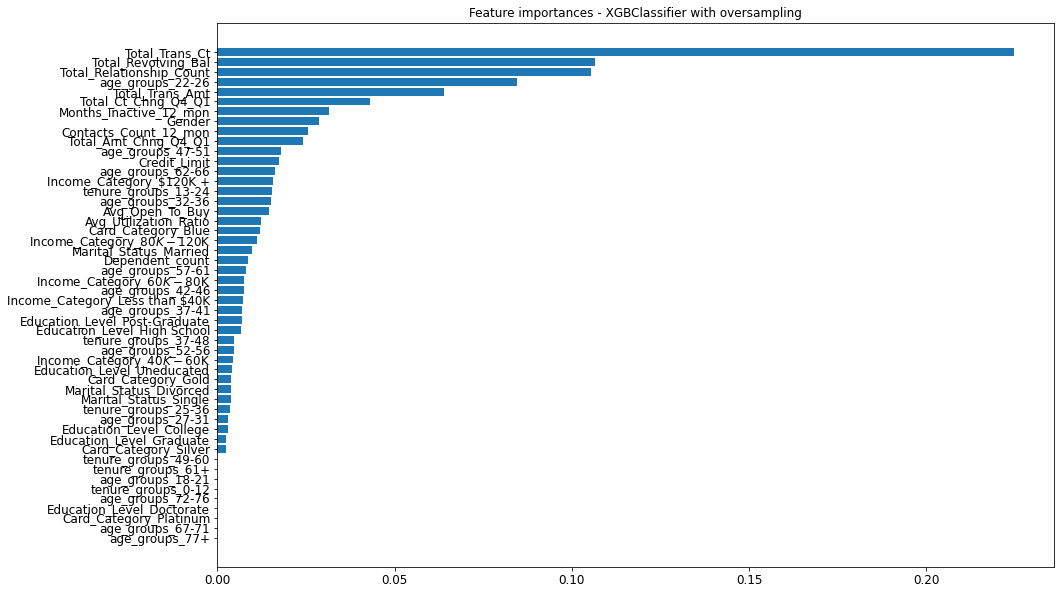

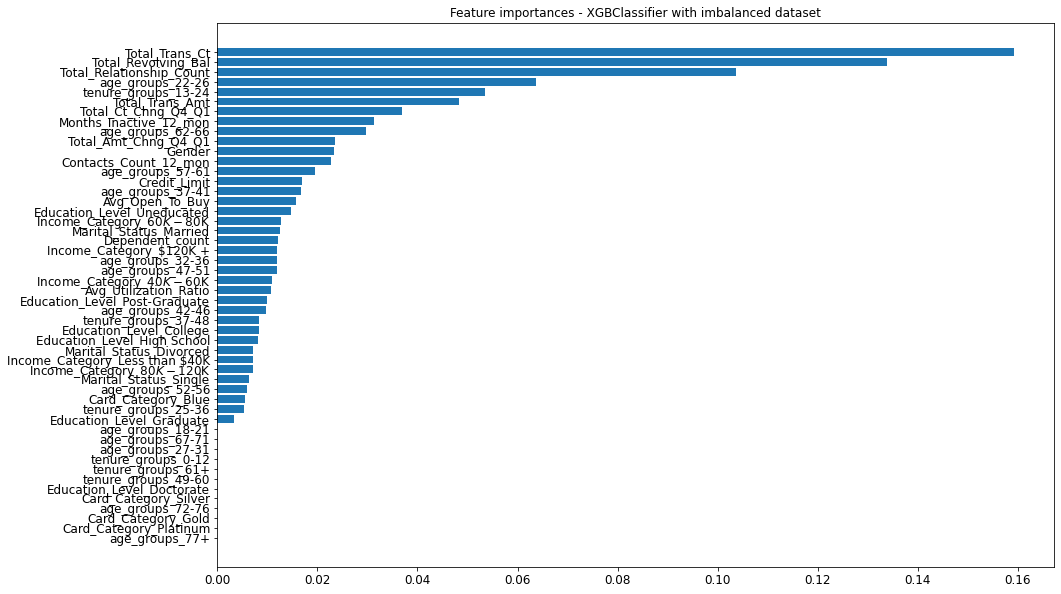

In [ ]:
# Compute and plot feature importances for the XGBClassifier with oversampling
importances_resampled = xgb_model.feature_importances_
indices_resampled = np.argsort(importances_resampled)[::-1]
plt.figure(figsize=(15,10))
plt.title("Feature importances - XGBClassifier with oversampling")
plt.barh(range(X_train_resampled.shape[1]), importances_resampled[indices_resampled])
plt.gca().invert_yaxis() # invert the y-axis to show the most important feature on top
plt.yticks(range(X_train_resampled.shape[1]), X_train.columns[indices_resampled], fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# Compute and plot feature importances for the XGBClassifier with imbalanced dataset
importances_imbalanced = xgb_clf.feature_importances_
indices_imbalanced = np.argsort(importances_imbalanced)[::-1]
plt.figure(figsize=(15,10))
plt.title("Feature importances - XGBClassifier with imbalanced dataset")
plt.barh(range(X_train.shape[1]), importances_imbalanced[indices_imbalanced])
plt.gca().invert_yaxis() # invert the y-axis to show the most important feature on top
plt.yticks(range(X_train.shape[1]), X_train.columns[indices_imbalanced], fontsize=12)
plt.xticks(fontsize=12)
plt.show()




The feature "Total Trans Ct" has the highest permutation importance score, which means that it has the most impact on the model's performance. The second highest permutation importance score is for the feature "Total Trans Amt", indicating that it is the second most important feature in the model.The high permutation importance scores for both of these features suggest that they are both significant predictors of customer churn. In other words, customers who have made a large number of transactions and spent a significant amount of money are less likely to churn compared to those who have made fewer transactions or spent less money.

This can be explained by the fact that customers who make more transactions and spend more money are likely to be more engaged with the product or service being offered. They may have formed strong habits or loyalty towards the brand, making it less likely that they will switch to a competitor. On the other hand, customers who have made fewer transactions or spent less money may not be as invested in the brand and may be more likely to churn.

Knowing that these features are important predictors of customer churn can help businesses to identify customers who may be at risk of churning and take steps to retain them. For example, businesses may offer targeted promotions or incentives to customers who have made fewer transactions or spent less money in order to encourage them to continue using the product or service. Alternatively, businesses may focus on providing excellent customer service to build stronger relationships with their customers and increase overall engagement.





In [ ]:
new_df1_target0.to_csv('cust_Non_churnd.csv')

In [ ]:
new_df1_target0.shape

(8500, 22)

In [ ]:
churn_data_copy['predicted_prob'] = xgb_model.predict_proba(X)[:, 1]

In [ ]:
churn_data_copy.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,tenure_groups,age_groups,predicted_prob
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,37-48,42-46,0.000269
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,37-48,47-51,0.000018
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,25-36,47-51,0.000024
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,25-36,37-41,0.000012
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,13-24,37-41,0.008644


In [ ]:
# create risk categories based on predicted probabilities
bins = [-float('inf'), 0.25, 0.5, 0.75, float('inf')]
labels = ['non-risk', 'low-risk', 'risky', 'high-risk']
churn_data_copy['risk_category'] = pd.cut(churn_data_copy['predicted_prob'], bins=bins, labels=labels)

# save the modified dataset
churn_data_copy.to_csv('modified_dataset.csv', index=False)

In [ ]:
churn_data_copy.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,tenure_groups,age_groups,predicted_prob,risk_category
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,11914.0,1.335,1144,42,1.625,0.061,37-48,42-46,0.000269,non-risk
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,7392.0,1.541,1291,33,3.714,0.105,37-48,47-51,0.000018,non-risk
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,2.594,1887,20,2.333,0.000,25-36,47-51,0.000024,non-risk
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,796.0,1.405,1171,20,2.333,0.760,25-36,37-41,0.000012,non-risk
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,2.175,816,28,2.500,0.000,13-24,37-41,0.008644,non-risk


In [ ]:
churn_data = pd.read_csv("/content/Bank churn data.csv")

churn_data_copy["CLIENTNUM"]  = churn_data["CLIENTNUM"] 

In [ ]:
churn_data_copy.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,tenure_groups,age_groups,predicted_prob,risk_category,CLIENTNUM
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,1.335,1144,42,1.625,0.061,37-48,42-46,0.000269,non-risk,768805383
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,1.541,1291,33,3.714,0.105,37-48,47-51,0.000018,non-risk,818770008
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,2.594,1887,20,2.333,0.000,25-36,47-51,0.000024,non-risk,713982108
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1.405,1171,20,2.333,0.760,25-36,37-41,0.000012,non-risk,769911858
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,2.175,816,28,2.500,0.000,13-24,37-41,0.008644,non-risk,709106358


In [ ]:
# save the modified dataset
churn_data_copy.to_csv('modified_dataset.csv', index=False)